### 텐서뽀개기 Part1  2017/08/08(화) 4회차 모임
### Hands on Machine learning scikit_learn_and_Tensorflow

- 스터디 : 캐글뽀개기 - 텐서뽀개기
- 페이스북 : <https://www.facebook.com/groups/kagglebreak/>
- github : <https://github.com/KaggleBreak/tensorbreak>
- 구글드라이브 : 
<https://drive.google.com/drive/folders/0B2l0iH28o85xM3A3TVhGdkFHb3M>


### 11장. Training Deep Neural Nets

- 10 장에서는 인공 신경망을 소개하고 우리의 첫 번째 딥 신경망 (Deep Neural Network)을 훈련했습니다. 
- 그러나 이것은 매우 얕은 DNN이었으며 두 개의 숨겨진 레이어만 있었습니다. 
- 고해상도 이미지에서 수백 가지 유형의 객체를 감지하는 것과 같이 매우 복잡한 문제를 해결해야하는 경우에는 어떻게 해야 합니까? 
- 훨씬 깊이있는 DNN을 훈련해야 할 수도 있습니다. 예를 들어 수백 개의 뉴런을 포함하는 10 개의 레이어가 수천 개의 연결 고리로 연결되어 있습니다. 


    1. 첫째, Deep Neural Nets에 영향을 미치고 하위 계층을 매우 힘들게 훈련시키는 까다로운 그라디언트 손실 문제 (또는 그라디언트 폭발 문제)에 직면하게됩니다.

    2. 둘째, 대규모 네트워크에서 훈련은 매우 느립니다.

    3. 셋째, 수백만 개의 매개 변수가 있는 모델은 훈련 세트에 과도한 영향을 줄 수 있습니다.

- 이 장에서는 이러한 각 문제를 차례대로 살펴보고 해결 방법을 제시합니다. 우리는 사라지는 그라디언트 문제를 설명하고 이 문제에 대한 가장 대중적인 해결책을 모색하는 것으로 시작할 것입니다. 

- 다음으로 우리는 다양한 그라디언트 디센트와 비교하여 대용량 모델을 엄청나게 빠르게 훈련할 수있는 다양한 옵티마이저를 살펴볼 것입니다.
- 마지막으로 대규모 신경망에 대한 몇 가지 인기있는 정규화 기술을 살펴 보겠습니다. 


### Vanishing/exploding gradients problems
- 역전파 알고리즘은 출력 레이어에서 입력 레이어로 이동하여 그라디언트의 에러를 전파합니다. 알고리즘이 네트워크의 각 매개 변수와 관련하여 비용 함수의 그래디언트를 계산하여 사용하면 각 매개 변수를 Gradient Descent 단계로 업데이트 합니다.

- 불행하게도, 그라디언트는 알고리즘이 하위 레이어로 진행함에 따라 종종 작아지고 작아집니다. 결과적으로 Gradient Descent 업데이트는 하위 계층 연결 가중치를 거의 변경하지 않으며 훈련은 좋은 솔루션으로 수렴하지 않습니다. 이것을 사라지는 그라디언트 문제라고 합니다. 경우에 따라 그 반대가 발생할 수 있습니다. 즉, 그래디언트가 커질 수 있기 때문에 하위 레이어가 대폭 업데이트 되고 알고리즘이 분기됩니다. 이것은 폭발하는 그라디언트 문제입니다. 

- 보다 일반적으로, deep neural network는 불안정한 그라디언트로 인해 어려움을 겪습니다. 즉, 서로 다른 계층이 서로 다른 속도로 학습 할 수 있습니다.

    - 이러한 불행한 행동이 경험적으로 관찰되었지만 (깊은 신경망이 대부분 오랫동안 버려진 이유 중 하나이기도 합니다), 2010 년 전후로는 이를 이해하는 데 상당한 진전이 있었습니다. 

- Xavier Glorot와 Y. Bengio의 "깊은 피드 포워드 신경 네트워크 훈련의 어려움을 이해하는 것"은 인기있는 시그모이드 활성화 함수와 그 당시 가장 대중적이었던 weight 초기화 기술의 조합을 포함하여 몇 가지 해결책을 발견했습니다. 즉, 평균 0과 표준 편차 1의 정규 분포를 사용하는 무작위 초기화입니다. 

    - 간단히 말해서,이 활성화 함수와 초기화 방법을 사용하면 각 계층의 출력의 편차가 그 입력. 네트워크에서 앞으로 나아가면, 활성화 함수가 최상위 레이어에서 포화될 때까지 각 레이어 이후에 분산이 계속 증가합니다. 이것은 실제로 로지스틱 함수가 0.5가 아니라 0이 아니라는 사실에 의해 악화됩니다 (쌍곡선 탄젠트 함수는 평균이 0이고 깊은 네트워크에서 로지스틱 함수보다 약간 더 나은 행동을 보입니다).

- 로지스틱 활성화 함수 (그림 11-1 참조)를 보면 입력이 커지면 (음수 또는 양수) 함수가 0 또는 1로 포화하고 미분이 0에 가깝다는 것을 알 수 있습니다. 따라서 역전파가 시작될 때, 네트워크를 통해 다시 확산되는 그라디언트가 거의 없으며, 최상위 레이어를 통해 역전파가 진행됨에 따라 약간의 그라디언트가 희박해져서 하위 레이어에는 아무것도 남지 않았습니다.

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

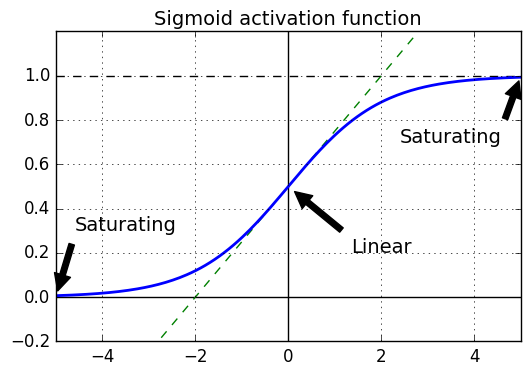

In [133]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

### Xavier and He initialization

- Glorot과 Bengio는 논문에서 문제를 상당히 완화시키는 방법을 제안합니다. 

- 우리는 신호가 양방향으로 적절히 흐를 필요가 있습니다: 예측을 할 때 앞 방향으로, 그래디언트를 역전파 할 때 반대 방향으로 신호가 필요합니다. 

- 각 층의 출력의 분산이 입력의 분산과 동일해야한다고 주장하고 반대 방향의 층을 통과하기 전후의 균등 분산을 필요로 한다고 주장한다 (수학적 세부 사항에 관심이 있다면이 논문을 확인하십시오).

- 레이어가 동일한 수의 입출력 연결을 갖고 있지 않으면 실제로 보장 할 수는 없지만 실제로 잘 작동하는 것으로 입증된 좋은 절충안을 제안했습니다. 

- 연결 가중치는 식 11에 설명된대로 무작위로 초기화해야합니다. 여기서 n 개의 입력 및 n 개의 출력은 가중치가 초기화되는 계층 (팬 - 인 및 팬 - 아웃이라고도 함)에 대한 입력 및 출력 연결 수입니다. 

- 이 초기화 전략은 Xavier 초기화 (작성자의 이름 뒤에) 또는 Glorot 초기화라고도 합니다.

![img11_1](img/ch11_2.png)

- 입력 연결 수가 출력 연결 수와 대략 같으면 간단한 방정식을 얻을 수 있습니다. 이 간단한 전략을 10 장에서 사용했습니다. (eg. σ = 1/ root(n inputs) or r = 3/ root(n inputs) 

- Xavier 초기화 전략을 사용하면 훈련 속도가 상당히 빨라질 수 있으며 Deep Learning의 현재 성공을 이끌어 낸 트릭 중 하나입니다. 표 11-1에서 볼 수 있듯이 최근의 일부 논문 3은 다양한 활성화 기능에 대해 유사한 전략을 제공했습니다. ReLU 활성화 함수 (및 아래에 설명 된 ELU 활성화를 비롯한 다양한 변형)에 대한 초기화 전략은 때때로 He 초기화라고도합니다 (작성자의 성과 같음)

![img11_1](img/ch11_3.png)

- 기본적으로 fully_connected() 함수 (제 10 장에서 소개)는 Xavier 초기화 (균일 분포)를 사용합니다. variance_scaling_initializer() 함수를 사용하여 이를 He 초기화로 변경할 수 있습니다.

주의 :이 책은 `tf.layers.dense ()`(이 장을 쓸 때 없었던) 대신 `tensorflow.contrib.layers.fully_connected()`를 사용합니다. contrib 모듈의 내용은 예고없이 변경되거나 삭제 될 수 있으므로 `tf.layers.dense()`를 사용하는 것이 더 바람직합니다. `dense()`함수는 `fully_connected ()` 함수와 거의 같습니다. 이 장과 관련된 주요 차이점은 다음과 같습니다.

* 여러 매개 변수의 이름이 바뀌 었습니다 :`scope`는 `name`이 되고,`activation_fn`은 `activation`이 됩니다 (마찬가지로 `_fn` 접미사는`normalizer_fn` 같은 다른 매개 변수에서 제거됩니다),`weights_initializer`는 `kernel_initializer` 등이 됩니다. 
* 디폴트 `activation`은 `tf.nn.relu`보다는 `None`입니다.
*`tensorflow.contrib.framework.arg_scope()`를 지원하지 않습니다 (11 장에서 나중에 소개됩니다).
* 정규 표현식 매개 변수는 지원하지 않습니다 (11 장에서 나중에 소개).

In [5]:
import tensorflow as tf

In [6]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")

In [7]:
he_init = tf.contrib.layers.variance_scaling_initializer()
hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu,
                          kernel_initializer=he_init, name="hidden1")

In [8]:
he_init

<function tensorflow.contrib.layers.python.layers.initializers.variance_scaling_initializer.<locals>._initializer>

In [9]:
hidden1

<tf.Tensor 'hidden1/Relu:0' shape=(?, 300) dtype=float32>

### Non-saturating activation functions (비포화 활성화 함수)

- X. Glorot와 Y. Bengio의 2010년 논문에서 얻은 통찰력 중 하나는 부분적으로는 활성화 기능의 선택이 좋지 않아서 사라지는 / 폭발하는 그라디언트 문제라는 것입니다. 

- 그때까지 대부분의 사람들은 대자연이 생물학적 뉴런에서 대략적인 시그모이드 활성화 기능을 사용하기로 결정했다면 그것은 탁월한 선택이어야 한다고 생각했습니다. 그러나 다른 활성화 함수는 깊은 신경망, 특히 ReLU 활성화 함수에서 훨씬 더 잘 작동합니다. 이는 주로 양수 값에 대해 포화되지 않기 때문에 (또한 계산 속도가 빠르기 때문입니다).

- 불행하게도, ReLU 활성화 기능은 완벽하지 않습니다. 그것은 죽어가는 ReLUs로 알려진 문제로 고통받고 있습니다 : 훈련 중, 일부 뉴런은 효과적으로 죽습니다. 즉, 0 이외의 출력을 멈추는 것을 의미합니다. 어떤 경우에는 네트워크의 뉴런 중 절반이 죽어있을 수 있습니다. 특히 큰 학습 속도. 훈련 도중 뉴런의 가중치가 음수가 되는 방식으로 뉴런의 가중치가 업데이트되면 0이 출력됩니다.

- 이것이 일어날 때, 입력이 음수 일 때 ReLU 함수의 그래디언트가 0이기 때문에 뉴런은 다시 생기지 않을 것입니다.

- 이 문제를 해결하려면 Leaky ReLU와 같은 ReLU 함수의 변형을 사용하는 것이 좋습니다. 

- 이 함수는 Leaky ReLUα z = max (αz, z)로 정의됩니다 (그림 11-2 참조). 

- 하이퍼 파라미터 α는 함수가 "Leaky"정도를 정의합니다. 0보다 작을 때의 함수의 기울기입니다. 일반적으로 0.01로 설정됩니다. 작은 경사면은 Leaky ReLUs가 결코 죽지 않는다는 것을 보증합니다. 그들은 긴 혼수 상태에 빠질 수는 있지만 결국 깨어날 기회가 있습니다. 최근의 논문에서는 ReLU 활성화 함수의 여러 변종과 그 결론 중 하나를 비교 한 결과, Leaky 변이가 엄격한 ReLU 활성화 함수보다 항상 뛰어나다는 결론을 얻었습니다. 

In [10]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

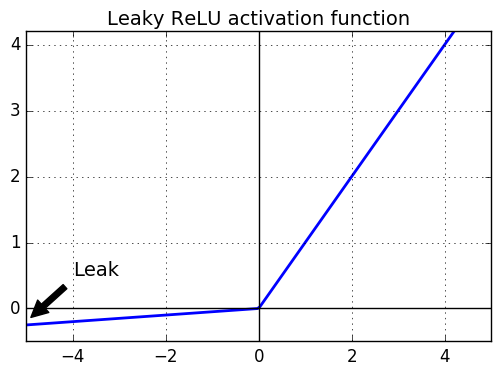

In [14]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

In [19]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")

In [20]:
def leaky_relu(z, name=None):
    return tf.maximum(0.01 * z, z, name=name)

hidden1 = tf.layers.dense(X, n_hidden1, activation=leaky_relu, name="hidden1")

In [21]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [23]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [24]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=leaky_relu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=leaky_relu, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [25]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [26]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [27]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [28]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [29]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [30]:
n_epochs = 40
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 5 == 0:
            acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
            acc_test = accuracy.eval(feed_dict={X: mnist.validation.images, y: mnist.validation.labels})
            print(epoch, "Batch accuracy:", acc_train, "Validation accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.86 Validation accuracy: 0.9044
5 Batch accuracy: 0.94 Validation accuracy: 0.951
10 Batch accuracy: 0.96 Validation accuracy: 0.9666
15 Batch accuracy: 1.0 Validation accuracy: 0.9722
20 Batch accuracy: 1.0 Validation accuracy: 0.9748
25 Batch accuracy: 1.0 Validation accuracy: 0.9768
30 Batch accuracy: 0.98 Validation accuracy: 0.9778
35 Batch accuracy: 0.96 Validation accuracy: 0.9796


- 마지막으로 Djork-Arné Clevert 외 2015년 모든 ReLU 변형을 능가하는 Exponential Linear Unit (ELU) 라 불리는 새로운 활성화 함수를 제안했다. 훈련 시간이 단축되고 신경망이 테스트 세트에서 더 잘 수행되었다. 그림 11-3에 표현되어 있으며, 식 11-2는 그 정의를 보여줍니다.

![img11_1](img/ch11_4.png)

- 몇 가지 큰 차이점을 제외하고는 ReLU 기능과 매우 비슷합니다.
- 먼저 z가 0보다 작을 때 음수 값을 취합니다. 이 값을 사용하면 장치의 평균 출력이 0에 가깝습니다. 위와 같이 소실점 그라디언트 문제를 완화하는 데 도움이 됩니다. 하이퍼 파라미터 α는 z가 큰 음수 일 때 ELU 함수가 접근하는 값을 정의합니다. 일반적으로 1로 설정되지만 원하는 경우 다른 하이퍼 매개 변수처럼 조정할 수 있습니다.

- 둘째, z가 0보다 작을 때 0이 아닌 그라디언트가 있으므로 유닛이 죽어버리는 이슈가 발생하지 않습니다.
- 셋째, 함수는 z = 0 주변을 포함하여 모든 면에서 매끄럽습니다. 그래디언트 하강 속도를 높이는 데 도움이 됩니다. 
- ELU 활성화 함수의 주된 단점은 ReLU 및 그 변형 (지수 함수 사용으로 인해)보다 느리게 계산되지만, 훈련 중에는 더 빠른 수렴 속도로 보상됩니다. 그러나 테스트 시간에 ELU 네트워크는 ReLU 네트워크보다 느립니다.

In [31]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

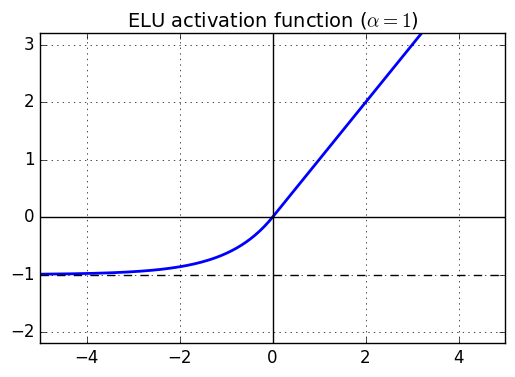

In [32]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [33]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")

In [34]:
hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.elu, name="hidden1")

- 그렇다면 어떤 활성화 기능을 딥 뉴럴 네트워크에 사용해야 합니까? 귀하의 마일리지는 일반적으로 ELU > Leaky ReLU (및 그 변형) > ReLU > tanh > logistic에서 다양합니다. 런타임 성능이 중요하다면 ELU보다 Leaky ReLUs를 선호할 것입니다. 또 다른 하이퍼 파라미터를 조정하고 싶지 않다면 위에서 제안한 디폴트 α 값을 사용할 수 있습니다 (Leaky ReLU의 경우 0.01, ELU의 경우 1). 

- 여유 시간과 계산 능력이 있다면 상호 인증을 사용하여 다른 활성화 기능, 특히 네트워크가 과도한 경우 RReLU를, 또는 거대한 교육 세트가있는 경우 PReLU를 평가할 수 있습니다.


### SELU

- This activation function was proposed in this [great paper](https://arxiv.org/pdf/1706.02515.pdf) by Günter Klambauer, Thomas Unterthiner and Andreas Mayr, published in June 2017 (I will definitely add it to the book). It outperforms the other activation functions very significantly for deep neural networks, so you should really try it out.

- “scaled exponential linear units”

In [35]:
def selu(z,
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * elu(z, alpha)

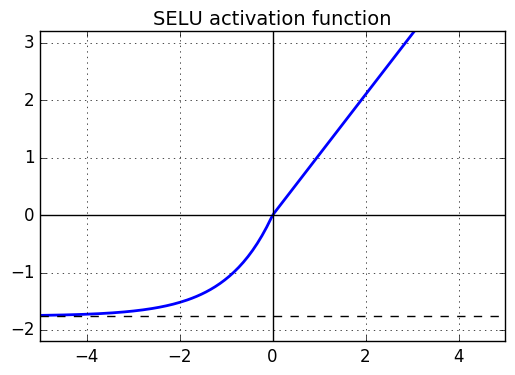

In [36]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [37]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100))
for layer in range(100):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1/100))
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=1)
    stds = np.std(Z, axis=1)
    if layer % 10 == 0:
        print("Layer {}: {:.2f} < mean < {:.2f}, {:.2f} < std deviation < {:.2f}".format(
            layer, means.min(), means.max(), stds.min(), stds.max()))

Layer 0: -0.26 < mean < 0.27, 0.74 < std deviation < 1.27
Layer 10: -0.24 < mean < 0.27, 0.74 < std deviation < 1.27
Layer 20: -0.17 < mean < 0.18, 0.74 < std deviation < 1.24
Layer 30: -0.27 < mean < 0.24, 0.78 < std deviation < 1.20
Layer 40: -0.38 < mean < 0.39, 0.74 < std deviation < 1.25
Layer 50: -0.27 < mean < 0.31, 0.73 < std deviation < 1.27
Layer 60: -0.26 < mean < 0.43, 0.74 < std deviation < 1.35
Layer 70: -0.19 < mean < 0.21, 0.75 < std deviation < 1.21
Layer 80: -0.18 < mean < 0.16, 0.72 < std deviation < 1.19
Layer 90: -0.19 < mean < 0.16, 0.75 < std deviation < 1.20


- Here's a TensorFlow implementation (there will almost certainly be a tf.nn.selu() function in future TensorFlow versions):

In [38]:
def selu(z,
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * tf.where(z >= 0.0, z, alpha * tf.nn.elu(z))

- SELUs can also be combined with dropout, check out [this implementation](https://github.com/bioinf-jku/SNNs/blob/master/selu.py) by the Institute of Bioinformatics, Johannes Kepler University Linz.

- Let's create a neural net for MNIST using the SELU activation function:

In [39]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=selu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=selu, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()
n_epochs = 40
batch_size = 50

- Now let's train it. Do not forget to scale the inputs to mean 0 and standard deviation 1:

In [40]:
means = mnist.train.images.mean(axis=0, keepdims=True)
stds = mnist.train.images.std(axis=0, keepdims=True) + 1e-10

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch_scaled = (X_batch - means) / stds
            sess.run(training_op, feed_dict={X: X_batch_scaled, y: y_batch})
        if epoch % 5 == 0:
            acc_train = accuracy.eval(feed_dict={X: X_batch_scaled, y: y_batch})
            X_val_scaled = (mnist.validation.images - means) / stds
            acc_test = accuracy.eval(feed_dict={X: X_val_scaled, y: mnist.validation.labels})
            print(epoch, "Batch accuracy:", acc_train, "Validation accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final_selu.ckpt")

0 Batch accuracy: 0.96 Validation accuracy: 0.924
5 Batch accuracy: 1.0 Validation accuracy: 0.957
10 Batch accuracy: 0.94 Validation accuracy: 0.967
15 Batch accuracy: 0.98 Validation accuracy: 0.9682
20 Batch accuracy: 1.0 Validation accuracy: 0.9708
25 Batch accuracy: 1.0 Validation accuracy: 0.969
30 Batch accuracy: 1.0 Validation accuracy: 0.9698
35 Batch accuracy: 1.0 Validation accuracy: 0.9708


### Batch Normalization

- ELU (또는 ReLU의 변형)와 함께 초기화를 사용하면 훈련 초기에 사라지는 / 폭발하는 그라디언트 문제가 크게 줄어들지만 훈련 도중 돌아오지 않을 것이라고 보장하지는 않습니다.

- 2015 년 논문 6에서 Sergey Ioffe와 Christian Szegedy는 소실 / 폭발 그라디언트 문제를 다루기 위해 Batch Normalization(BN)이라고 하는 기술을 제안했으며, 보다 일반적으로 이전 계층의 매개 변수로서 각 계층 입력의 분포가 변경되는 문제 레이어가 변경됩니다 (내부 공변량 문제)

- 이 기법은 각 레이어의 활성화 기능 직전에 모델에 연산을 추가하고, 입력을 제로 - 센터링 및 정규화 한 다음 레이어 당 두 개의 새로운 매개 변수를 사용하여 결과를 스케일링하고 이동하는 것으로 구성됩니다 (하나는 스케일링 용이고 다른 하나는 시프트 용). 즉,이 작업을 통해 모델은 각 레이어의 입력 값의 최적 스케일 및 평균을 학습 할 수 있습니다.

- 입력을 중심에 맞추고 정규화하기 위해 알고리즘은 입력의 평균 및 표준 편차를 추정해야 합니다. 그것은 현재 미니 배치 (따라서 "Batch Normalization"이라는 이름)를 통해 입력의 평균 및 표준 편차를 평가함으로써 그렇게 합니다. 전체 동작은 식 11-3에 요약되어 있습니다.

![img11_1](img/ch11_5.png)

- 테스트에는 경험적 평균과 표준 편차를 계산할 미니 배치가 없으므로 대신 전체 훈련 세트의 평균 및 표준 편차를 사용하십시오. 

- 이들은 일반적으로 이동 평균을 사용하여 훈련 중에 효율적으로 계산됩니다. 따라서 전체적으로 γ (스케일), β (오프셋), μ (평균) 및 σ (표준 편차)와 같은 각 배치 정규화 된 레이어에 대해 4 개의 매개 변수가 학습됩니다.

- 이 기술이 실험 한 모든 딥 뉴럴 네트워크를 상당히 개선 시켰음을 보여주었습니다. 사라지는 그라디언트 문제는 tanh 및 로지스틱 활성화 함수와 같은 포화 활성화 함수를 사용할 수 있을 정도로 크게 감소했습니다. 네트워크는 또한 가중치 초기화에 덜 민감했습니다.

- 훨씬 더 큰 학습 속도를 사용할 수 있었고, 학습 과정의 속도가 크게 빨라졌습니다. 일괄 정규화 된 네트워크의 앙상블을 바탕으로 ImageNet 분류에 대한 가장 잘 알려진 결과를 향상시킵니다 : 4.9 %의 상위 5 가지 유효성 검증 오류 (및 4.8 %의 테스트 오류)에 도달하여 사람 평가자의 정확도를 초과합니다. 

- "마지막으로, Batch Normalization은 규칙 화기처럼 작동하여 다른 정규화 기술(예 : Dropout)을 사용할 필요가 없습니다.

- 그러나 Batch Normalization은 모델에 약간의 복잡성을 추가합니다 (입력 데이터를 정규화 할 필요가 없지만 일차 숨겨진 레이어는 일괄 정규화를 제공하므로이를 처리 할 것이므로). 또한, 런타임 패널티가 있습니다. 신경망은 각 계층에 필요한 추가 계산으로 인해 예측 속도가 느려집니다. 따라서 예측이 번개처럼 빨라지려면 일괄 정규화로 재생하기 전에 ELU + He 초기화가 얼마나 잘 수행되는지 확인해야합니다.

### Implementing Batch Normalization with TensorFlow

- TensorFlow는 입력을 센터링하고 정규화하는 batch_normalization() 함수를 제공하지만 사용자는 평균 및 표준 편차를 직접 계산해야합니다 (위에서 설명한 것처럼 트레이닝 중 미니 배치 데이터 또는 테스트 중 전체 데이터 세트를 기반으로 함) 
 
- 매개 변수로 이 함수에 전달하고 스케일링 및 오프셋 매개 변수의 생성을 처리해야합니다 (그리고 이 함수에 전달). 그것은 가능하지만 가장 편리한 접근법은 아닙니다. 대신이 모든 것을 처리하는 batch_norm() 함수를 사용해야합니다. 직접 호출하거나 fully_connected() 함수에 다음 코드와 같이 사용하도록 지시 할 수 있습니다.

In [43]:
reset_graph()

import tensorflow as tf

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")

training = tf.placeholder_with_default(False, shape=(), name='training')

hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1")
bn1 = tf.layers.batch_normalization(hidden1, training=training, momentum=0.9)
bn1_act = tf.nn.elu(bn1)

hidden2 = tf.layers.dense(bn1_act, n_hidden2, name="hidden2")
bn2 = tf.layers.batch_normalization(hidden2, training=training, momentum=0.9)
bn2_act = tf.nn.elu(bn2)

logits_before_bn = tf.layers.dense(bn2_act, n_outputs, name="outputs")
logits = tf.layers.batch_normalization(logits_before_bn, training=training,
                                       momentum=0.9)

In [42]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
training = tf.placeholder_with_default(False, shape=(), name='training')

- To avoid repeating the same parameters over and over again, we can use Python's partial() function:
- [python Partial 설명](http://www.incodom.kr/%ED%8C%8C%EC%9D%B4%EC%8D%AC/%ED%95%A8%EC%88%98)

In [45]:
from functools import partial

my_batch_norm_layer = partial(tf.layers.batch_normalization,
                              training=training, momentum=0.9)

hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1")
bn1 = my_batch_norm_layer(hidden1)
bn1_act = tf.nn.elu(bn1)
hidden2 = tf.layers.dense(bn1_act, n_hidden2, name="hidden2")
bn2 = my_batch_norm_layer(hidden2)
bn2_act = tf.nn.elu(bn2)
logits_before_bn = tf.layers.dense(bn2_act, n_outputs, name="outputs")
logits = my_batch_norm_layer(logits_before_bn)

- Let's build a neural net for MNIST, using the ELU activation function and Batch Normalization at each layer:

In [134]:
my_batch_norm_layer

functools.partial(<function batch_normalization at 0x110a88488>, momentum=0.9, training=<tf.Tensor 'training:0' shape=() dtype=bool>)

In [46]:
reset_graph()

batch_norm_momentum = 0.9

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")
training = tf.placeholder_with_default(False, shape=(), name='training')

with tf.name_scope("dnn"):
    he_init = tf.contrib.layers.variance_scaling_initializer()

    my_batch_norm_layer = partial(
            tf.layers.batch_normalization,
            training=training,
            momentum=batch_norm_momentum)

    my_dense_layer = partial(
            tf.layers.dense,
            kernel_initializer=he_init)

    hidden1 = my_dense_layer(X, n_hidden1, name="hidden1")
    bn1 = tf.nn.elu(my_batch_norm_layer(hidden1))
    hidden2 = my_dense_layer(bn1, n_hidden2, name="hidden2")
    bn2 = tf.nn.elu(my_batch_norm_layer(hidden2))
    logits_before_bn = my_dense_layer(bn2, n_outputs, name="outputs")
    logits = my_batch_norm_layer(logits_before_bn)

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

- Note: since we are using tf.layers.batch_normalization() rather than tf.contrib.layers.batch_norm() (as in the book), we need to explicitly run the extra update operations needed by batch normalization (sess.run([training_op, extra_update_ops],...)

In [47]:
n_epochs = 20
batch_size = 200

In [48]:
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run([training_op, extra_update_ops],
                     feed_dict={training: True, X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,
                                                y: mnist.test.labels})
        print(epoch, "Test accuracy:", accuracy_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Test accuracy: 0.8721
1 Test accuracy: 0.8981
2 Test accuracy: 0.9134
3 Test accuracy: 0.9238
4 Test accuracy: 0.9297
5 Test accuracy: 0.9352
6 Test accuracy: 0.9405
7 Test accuracy: 0.9436
8 Test accuracy: 0.947
9 Test accuracy: 0.9502
10 Test accuracy: 0.9528
11 Test accuracy: 0.9549
12 Test accuracy: 0.9566
13 Test accuracy: 0.9589
14 Test accuracy: 0.9602
15 Test accuracy: 0.9612
16 Test accuracy: 0.962
17 Test accuracy: 0.9637
18 Test accuracy: 0.9651
19 Test accuracy: 0.9656


In [136]:
extra_update_ops

[<tf.Tensor 'dnn/batch_normalization/AssignMovingAvg:0' shape=(300,) dtype=float32_ref>,
 <tf.Tensor 'dnn/batch_normalization/AssignMovingAvg_1:0' shape=(300,) dtype=float32_ref>,
 <tf.Tensor 'dnn/batch_normalization_2/AssignMovingAvg:0' shape=(100,) dtype=float32_ref>,
 <tf.Tensor 'dnn/batch_normalization_2/AssignMovingAvg_1:0' shape=(100,) dtype=float32_ref>,
 <tf.Tensor 'dnn/batch_normalization_3/AssignMovingAvg:0' shape=(10,) dtype=float32_ref>,
 <tf.Tensor 'dnn/batch_normalization_3/AssignMovingAvg_1:0' shape=(10,) dtype=float32_ref>]

In [137]:
training_op

<tf.Operation 'train/Momentum' type=NoOp>

- 그리고 tf.get_collection(tf.GraphKeys.UPDATE_OPS)을 수행하면, 정규화값들의 리스트가 리턴된다.

- 뭐!? 그것은 MNIST에 대한 큰 정확성이 아닙니다. 물론, 더 길게 훈련하면 정확도는 훨씬 좋아질 것입니다. 그러나 그러한 얕은 네트워크에서 Batch Norm과 ELU는 매우 긍정적인 영향을 미치지 않을 것입니다.

- Note that you could also make the training operation depend on the update operations:

```python
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    with tf.control_dependencies(extra_update_ops):
        training_op = optimizer.minimize(loss)
```

- 이렇게하면 트레이닝 중에 'training_op'을 평가하기만 하면 TensorFlow가 자동으로 업데이트 작업을 실행합니다.

```python
sess.run(training_op, feed_dict={training: True, X: X_batch, y: y_batch})
```

- 한 가지 더 : 훈련 가능한 변수 목록이 모든 전역 변수 목록보다 짧음을 주목하십시오. 이동 평균은 훈련이 불가능한 변수이기 때문입니다. 미리 훈련 된 신경망 (아래 참조)을 재사용하려면 이러한 훈련 불가능한 변수를 잊어서는 안됩니다.

In [49]:
[v.name for v in tf.trainable_variables()]

['hidden1/kernel:0',
 'hidden1/bias:0',
 'batch_normalization/beta:0',
 'batch_normalization/gamma:0',
 'hidden2/kernel:0',
 'hidden2/bias:0',
 'batch_normalization_1/beta:0',
 'batch_normalization_1/gamma:0',
 'outputs/kernel:0',
 'outputs/bias:0',
 'batch_normalization_2/beta:0',
 'batch_normalization_2/gamma:0']

In [50]:
[v.name for v in tf.global_variables()]

['hidden1/kernel:0',
 'hidden1/bias:0',
 'batch_normalization/beta:0',
 'batch_normalization/gamma:0',
 'batch_normalization/moving_mean:0',
 'batch_normalization/moving_variance:0',
 'hidden2/kernel:0',
 'hidden2/bias:0',
 'batch_normalization_1/beta:0',
 'batch_normalization_1/gamma:0',
 'batch_normalization_1/moving_mean:0',
 'batch_normalization_1/moving_variance:0',
 'outputs/kernel:0',
 'outputs/bias:0',
 'batch_normalization_2/beta:0',
 'batch_normalization_2/gamma:0',
 'batch_normalization_2/moving_mean:0',
 'batch_normalization_2/moving_variance:0']

### Gradient clipping (기울기 제한)

- 폭발하는 그라데이션 문제를 줄이는 보편적인 기술은 backpropagation 중에 그라데이션을 제한하여 임계 값을 초과하지 않도록 하는 것입니다. 
- 이를 그라데이션 클리핑(제한)이라고합니다. 일반적으로 사람들은 이제 일괄 정규화를 선호하지만 그래디언트 클리핑을 구현하는 방법을 아는 것은 여전히 유용합니다.

- TensorFlow에서 optimizer의 minimize() 함수는 그라디언트를 계산하고 적용하기 때문에 옵티마이저의 compute_gradients() 메서드를 먼저 호출 한 다음 clip_by_value() 함수를 사용하여 그라디언트를 클리핑하는 작업을 만들고 마지막으로 최적화 프로그램의 apply_gradients() 메소드를 사용하여 클리핑 된 그라디언트를 적용하는 연산을 작성하십시오.

- 다양한 방법이 존재하지만 흔히 쓰이는 방법은 그래디언트의 L2 norm이 기준값을 초과할 때 (threshold / L2 norm)을 곱해주는 것입니다.

- [Difference between tf.clip_by_value and tf.clip_by_global_norm for RNN's and how to decide max value to clip on?](https://stackoverflow.com/questions/44796793/difference-between-tf-clip-by-value-and-tf-clip-by-global-norm-for-rnns-and-how)

In [51]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_hidden2 = 50
n_hidden3 = 50
n_hidden4 = 50
n_hidden5 = 50
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2")
    hidden3 = tf.layers.dense(hidden2, n_hidden3, activation=tf.nn.relu, name="hidden3")
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu, name="hidden4")
    hidden5 = tf.layers.dense(hidden4, n_hidden5, activation=tf.nn.relu, name="hidden5")
    logits = tf.layers.dense(hidden5, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [52]:
learning_rate = 0.01

In [54]:
threshold = 1.0

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
grads_and_vars = optimizer.compute_gradients(loss)
capped_gvs = [(tf.clip_by_value(grad, -threshold, threshold), var)
              for grad, var in grads_and_vars]
training_op = optimizer.apply_gradients(capped_gvs)

In [55]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

In [56]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [57]:
n_epochs = 20
batch_size = 200

In [58]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,
                                                y: mnist.test.labels})
        print(epoch, "Test accuracy:", accuracy_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Test accuracy: 0.3138
1 Test accuracy: 0.8003
2 Test accuracy: 0.8805
3 Test accuracy: 0.9037
4 Test accuracy: 0.9122
5 Test accuracy: 0.9196
6 Test accuracy: 0.9241
7 Test accuracy: 0.9299
8 Test accuracy: 0.9329
9 Test accuracy: 0.9388
10 Test accuracy: 0.9432
11 Test accuracy: 0.9451
12 Test accuracy: 0.9454
13 Test accuracy: 0.9483
14 Test accuracy: 0.9525
15 Test accuracy: 0.9513
16 Test accuracy: 0.9565
17 Test accuracy: 0.9583
18 Test accuracy: 0.9561
19 Test accuracy: 0.9605


- 평소처럼 모든 훈련 단계에서 이 training_op을 실행하십시오. 그라디언트를 계산하고 -1.0에서 1.0 사이의 클립을 적용하고 적용합니다. 임계 값은 조정할 수있는 하이퍼 매개 변수입니다.

### Reusing pretrained layers

- 매우 큰 DNN을 처음부터 훈련하는 것은 일반적으로 좋은 생각이 아닙니다. 대신 힘든 문제와 씨름하려고 하는 것과 비슷한 작업을 수행하는 기존 신경망을 찾아서 이 계층의 하위 계층을 재사용 해야 합니다. 이런 네트워크를 transfer learning이라고 합니다. 훈련 속도가 현저하게 빨라질뿐만 아니라 훈련 데이터도 훨씬 적게 듭니다.

- 예를 들어 사진을 동물, 식물, 차량 및 일상 물체 등 100 가지 범주로 분류하도록 훈련된 DNN에 액세스 할 수 있다고 가정합니다. 이제 특정 차량 유형을 분류하기 위해 DNN을 훈련해야 합니다. 이러한 작업은 매우 유사하므로 첫 번째 네트워크의 일부를 재사용해야합니다 (그림 11-4 참조).

![img11_1](img/ch11_6.png)

- 새 작업의 입력 사진이 원래 작업에 사용 된 것과 동일한 크기가 아닌 경우 원래 모델에서 예상한 크기로 크기를 조정하기 위해 사전 처리 단계를 추가해야 합니다. 보다 일반적으로, 입력이 유사한 저수준 기능을 가지고 있는 경우에만 transfer learning이 잘 작동합니다.

In [59]:
reset_graph()

In [60]:
saver = tf.train.import_meta_graph("./my_model_final.ckpt.meta")

In [61]:
for op in tf.get_default_graph().get_operations():
    print(op.name)

X
y
hidden1/kernel/Initializer/random_uniform/shape
hidden1/kernel/Initializer/random_uniform/min
hidden1/kernel/Initializer/random_uniform/max
hidden1/kernel/Initializer/random_uniform/RandomUniform
hidden1/kernel/Initializer/random_uniform/sub
hidden1/kernel/Initializer/random_uniform/mul
hidden1/kernel/Initializer/random_uniform
hidden1/kernel
hidden1/kernel/Assign
hidden1/kernel/read
hidden1/bias/Initializer/zeros
hidden1/bias
hidden1/bias/Assign
hidden1/bias/read
dnn/hidden1/MatMul
dnn/hidden1/BiasAdd
dnn/hidden1/Relu
hidden2/kernel/Initializer/random_uniform/shape
hidden2/kernel/Initializer/random_uniform/min
hidden2/kernel/Initializer/random_uniform/max
hidden2/kernel/Initializer/random_uniform/RandomUniform
hidden2/kernel/Initializer/random_uniform/sub
hidden2/kernel/Initializer/random_uniform/mul
hidden2/kernel/Initializer/random_uniform
hidden2/kernel
hidden2/kernel/Assign
hidden2/kernel/read
hidden2/bias/Initializer/zeros
hidden2/bias
hidden2/bias/Assign
hidden2/bias/read
dn

- TensorBoard를 사용하여 그래프를 시각화하는 것이 훨씬 쉽습니다. 다음과 같은 해킹을 통해 Jupyter 내의 그래프를 시각화 할 수 있습니다 (브라우저에서 작동하지 않는 경우 FileWriter를 사용하여 그래프를 저장 한 다음 TensorBoard에서 시각화해야 함).

In [62]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [63]:
show_graph(tf.get_default_graph())

- 필요한 연산을 알고 있으면 그래프의 get_operation_by_name () 또는 get_tensor_by_name () 메소드를 사용하여 핸들을 얻을 수 있습니다.

In [64]:
X = tf.get_default_graph().get_tensor_by_name("X:0")
y = tf.get_default_graph().get_tensor_by_name("y:0")

accuracy = tf.get_default_graph().get_tensor_by_name("eval/accuracy:0")

training_op = tf.get_default_graph().get_operation_by_name("GradientDescent")

- 원래 모델을 작성한 사람이라면 작업에 매우 명확한 이름을 지정하고 문서화하여 모델을 재사용하는 사람들이 쉽게 작업 할 수 있습니다. 

- 또 다른 접근법은 사람들이 핸들을 얻고 자하는 모든 중요한 작업을 포함하는 모음을 만드는 것입니다.

In [65]:
for op in (X, y, accuracy, training_op):
    tf.add_to_collection("my_important_ops", op)

- 이렇게 하면 모델을 재사용하는 사람들은 다음과 같이 간단하게 작성할 수 있습니다.

In [66]:
X, y, accuracy, training_op = tf.get_collection("my_important_ops")

- 이제 세션을 시작하고 모델의 상태를 복원하고 데이터에 대한 훈련을 계속할 수 있습니다.

In [67]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt")
    # continue training the model...

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [68]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt")

    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,
                                                y: mnist.test.labels})
        print(epoch, "Test accuracy:", accuracy_val)

    save_path = saver.save(sess, "./my_new_model_final.ckpt")    

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
0 Test accuracy: 0.961
1 Test accuracy: 0.961
2 Test accuracy: 0.9625
3 Test accuracy: 0.9611
4 Test accuracy: 0.9638
5 Test accuracy: 0.9649
6 Test accuracy: 0.9664
7 Test accuracy: 0.963
8 Test accuracy: 0.9665
9 Test accuracy: 0.9668
10 Test accuracy: 0.9664
11 Test accuracy: 0.9671
12 Test accuracy: 0.9678
13 Test accuracy: 0.968
14 Test accuracy: 0.969
15 Test accuracy: 0.9686
16 Test accuracy: 0.969
17 Test accuracy: 0.9704
18 Test accuracy: 0.9673
19 Test accuracy: 0.9681


- 또는 원본 그래프를 작성한 Python 코드에 액세스 할 수 있으면 import_meta_graph () 대신이 코드를 사용할 수 있습니다.

In [69]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_hidden2 = 50
n_hidden3 = 50
n_hidden4 = 50
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2")
    hidden3 = tf.layers.dense(hidden2, n_hidden3, activation=tf.nn.relu, name="hidden3")
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu, name="hidden4")
    hidden5 = tf.layers.dense(hidden4, n_hidden5, activation=tf.nn.relu, name="hidden5")
    logits = tf.layers.dense(hidden5, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

learning_rate = 0.01
threshold = 1.0

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
grads_and_vars = optimizer.compute_gradients(loss)
capped_gvs = [(tf.clip_by_value(grad, -threshold, threshold), var)
              for grad, var in grads_and_vars]
training_op = optimizer.apply_gradients(capped_gvs)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [70]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt")

    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,
                                                y: mnist.test.labels})
        print(epoch, "Test accuracy:", accuracy_val)

    save_path = saver.save(sess, "./my_new_model_final.ckpt")    

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
0 Test accuracy: 0.9613
1 Test accuracy: 0.9619
2 Test accuracy: 0.962
3 Test accuracy: 0.9617
4 Test accuracy: 0.9643
5 Test accuracy: 0.9638
6 Test accuracy: 0.9649
7 Test accuracy: 0.9648
8 Test accuracy: 0.9671
9 Test accuracy: 0.9679
10 Test accuracy: 0.9677
11 Test accuracy: 0.9681
12 Test accuracy: 0.969
13 Test accuracy: 0.9685
14 Test accuracy: 0.9686
15 Test accuracy: 0.9695
16 Test accuracy: 0.9679
17 Test accuracy: 0.9694
18 Test accuracy: 0.9691
19 Test accuracy: 0.9709


- 일반적으로 하위 계층 만 다시 사용하고자 할 것입니다. import_meta_graph ()를 사용하는 경우 전체 그래프가 로드되지만 필요하지 않은 부분은 무시할 수 있습니다. 

- 이 예에서는 기존의 네 번째 숨겨진 레이어를 무시하고 사전에 배치 된 세 번째 레이어의 맨 위에 새로운 네 번째 숨겨진 레이어를 추가합니다. 

- 우리는 또한 새로운 출력 레이어,이 새로운 출력에 대한 손실 및이를 최소화하는 새로운 옵티 마이저를 구축합니다. 

- 또한 전체 그래프 (전체 이전 그래프와 새 연산 모두 포함)를 저장하고 초기화 작업을 통해 모든 새 변수를 초기화하는 또 다른 보호기가 필요합니다.

In [71]:
reset_graph()

n_hidden4 = 20  # new layer
n_outputs = 10  # new layer

saver = tf.train.import_meta_graph("./my_model_final.ckpt.meta")

X = tf.get_default_graph().get_tensor_by_name("X:0")
y = tf.get_default_graph().get_tensor_by_name("y:0")

hidden3 = tf.get_default_graph().get_tensor_by_name("dnn/hidden4/Relu:0")

new_hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu, name="new_hidden4")
new_logits = tf.layers.dense(new_hidden4, n_outputs, name="new_outputs")

with tf.name_scope("new_loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=new_logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("new_eval"):
    correct = tf.nn.in_top_k(new_logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

with tf.name_scope("new_train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
new_saver = tf.train.Saver()

- And we can train this new model:

In [72]:
with tf.Session() as sess:
    init.run()
    saver.restore(sess, "./my_model_final.ckpt")

    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,
                                                y: mnist.test.labels})
        print(epoch, "Test accuracy:", accuracy_val)

    save_path = new_saver.save(sess, "./my_new_model_final.ckpt")

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
0 Test accuracy: 0.9247
1 Test accuracy: 0.9378
2 Test accuracy: 0.9477
3 Test accuracy: 0.9514
4 Test accuracy: 0.9571
5 Test accuracy: 0.9571
6 Test accuracy: 0.9577
7 Test accuracy: 0.9597
8 Test accuracy: 0.9616
9 Test accuracy: 0.9619
10 Test accuracy: 0.9629
11 Test accuracy: 0.9618
12 Test accuracy: 0.963
13 Test accuracy: 0.9657
14 Test accuracy: 0.9643
15 Test accuracy: 0.9659
16 Test accuracy: 0.9664
17 Test accuracy: 0.9672
18 Test accuracy: 0.967
19 Test accuracy: 0.9684


- 원래 그래프를 작성한 Python 코드에 액세스 할 수 있다면 필요한 부분을 다시 사용하고 나머지 부분은 삭제할 수 있습니다.

In [73]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300 # reused
n_hidden2 = 50  # reused
n_hidden3 = 50  # reused
n_hidden4 = 20  # new!
n_outputs = 10  # new!

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")       # reused
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2") # reused
    hidden3 = tf.layers.dense(hidden2, n_hidden3, activation=tf.nn.relu, name="hidden3") # reused
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu, name="hidden4") # new!
    logits = tf.layers.dense(hidden4, n_outputs, name="outputs")                         # new!

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

- 그러나 미리 만들어진 모델을 복원하기 위해 하나의 `Saver`를 생성해야 합니다 (복원 할 변수의 목록을 제공하거나 그래프가 일치하지 않는다고 불평할 것입니다) 그리고 한 번만 새로운 모델을 저장하는 `Saver`를 한 번 만들어야 합니다.

In [74]:
reuse_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,
                               scope="hidden[123]") # regular expression
reuse_vars_dict = dict([(var.op.name, var) for var in reuse_vars])
restore_saver = tf.train.Saver(reuse_vars_dict) # to restore layers 1-3

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, "./my_model_final.ckpt")

    for epoch in range(n_epochs):                                      # not shown in the book
        for iteration in range(mnist.train.num_examples // batch_size): # not shown
            X_batch, y_batch = mnist.train.next_batch(batch_size)      # not shown
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})  # not shown
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,  # not shown
                                                y: mnist.test.labels}) # not shown
        print(epoch, "Test accuracy:", accuracy_val)                   # not shown

    save_path = saver.save(sess, "./my_new_model_final.ckpt")

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
0 Test accuracy: 0.9023
1 Test accuracy: 0.93
2 Test accuracy: 0.9392
3 Test accuracy: 0.9428
4 Test accuracy: 0.9485
5 Test accuracy: 0.9512
6 Test accuracy: 0.9517
7 Test accuracy: 0.954
8 Test accuracy: 0.9545
9 Test accuracy: 0.9571
10 Test accuracy: 0.9599
11 Test accuracy: 0.9602
12 Test accuracy: 0.9605
13 Test accuracy: 0.9621
14 Test accuracy: 0.9618
15 Test accuracy: 0.9635
16 Test accuracy: 0.963
17 Test accuracy: 0.9645
18 Test accuracy: 0.9651
19 Test accuracy: 0.9662


In [139]:
reuse_vars_dict

{'hidden1/bias': <tf.Variable 'hidden1/bias:0' shape=(300,) dtype=float32_ref>,
 'hidden1/kernel': <tf.Variable 'hidden1/kernel:0' shape=(784, 300) dtype=float32_ref>,
 'hidden2/bias': <tf.Variable 'hidden2/bias:0' shape=(50,) dtype=float32_ref>,
 'hidden2/kernel': <tf.Variable 'hidden2/kernel:0' shape=(300, 50) dtype=float32_ref>,
 'hidden3/bias': <tf.Variable 'hidden3/bias:0' shape=(50,) dtype=float32_ref>,
 'hidden3/kernel': <tf.Variable 'hidden3/kernel:0' shape=(50, 50) dtype=float32_ref>}

In [140]:
restore_saver

### Reusing models from other frameworks

- 다른 프레임 워크를 사용하여 모델을 학습 한 경우 수동으로 가중치를 로드해야 합니다 (예 : Theano 코드를 사용하여 Theano 코드를 사용하는 경우). 

- 그런 다음 해당 변수에 해당 값을 할당해야 합니다. 이것은 매우 지루할 수 있습니다. 예를 들어, 다음 코드는 다른 프레임 워크를 사용하여 훈련 된 모델의 첫 번째 숨겨진 레이어에서 가중치와 바이어스를 복사하는 방법을 보여줍니다.

- 이 예제에서 재사용하고자 하는 각 변수에 대해 이니셜 라이저의 할당 연산을 찾고 초기화 값에 해당하는 두 번째 입력을 얻습니다. 이니셜 라이저를 실행할 때, 우리는 feed_dict를 사용하여 원하는 값으로 초기화 값을 대체합니다.

In [75]:
reset_graph()

n_inputs = 2
n_hidden1 = 3

In [76]:
original_w = [[1., 2., 3.], [4., 5., 6.]] # Load the weights from the other framework
original_b = [7., 8., 9.]                 # Load the biases from the other framework

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")
# [...] Build the rest of the model

# Get a handle on the assignment nodes for the hidden1 variables
graph = tf.get_default_graph()
assign_kernel = graph.get_operation_by_name("hidden1/kernel/Assign")
assign_bias = graph.get_operation_by_name("hidden1/bias/Assign")
init_kernel = assign_kernel.inputs[1]
init_bias = assign_bias.inputs[1]

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init, feed_dict={init_kernel: original_w, init_bias: original_b})
    # [...] Train the model on your new task
    print(hidden1.eval(feed_dict={X: [[10.0, 11.0]]}))  # not shown in the book

[[  61.   83.  105.]]


- 참고 : tf.layers.dense () 함수로 만든 가중치 변수는 책과 같이 tf.contrib.layers.fully_connected ()를 사용할 때 "가중치"대신 "커널"이라고하고, 바이어스 대신 바이어스라고 부릅니다.

- 처음에 이 책에서 사용된 다른 접근법은 전용 할당 노드와 전용 자리 표시자를 만드는 것입니다. 이것은 보다 장황하고 덜 효율적이지만, 보다 명확하게 알 수 있습니다.

In [77]:
reset_graph()

n_inputs = 2
n_hidden1 = 3

original_w = [[1., 2., 3.], [4., 5., 6.]] # Load the weights from the other framework
original_b = [7., 8., 9.]                 # Load the biases from the other framework

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")
# [...] Build the rest of the model

# Get a handle on the variables of layer hidden1
with tf.variable_scope("", default_name="", reuse=True):  # root scope
    hidden1_weights = tf.get_variable("hidden1/kernel")
    hidden1_biases = tf.get_variable("hidden1/bias")

# Create dedicated placeholders and assignment nodes
original_weights = tf.placeholder(tf.float32, shape=(n_inputs, n_hidden1))
original_biases = tf.placeholder(tf.float32, shape=n_hidden1)
assign_hidden1_weights = tf.assign(hidden1_weights, original_weights)
assign_hidden1_biases = tf.assign(hidden1_biases, original_biases)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    sess.run(assign_hidden1_weights, feed_dict={original_weights: original_w})
    sess.run(assign_hidden1_biases, feed_dict={original_biases: original_b})
    # [...] Train the model on your new task
    print(hidden1.eval(feed_dict={X: [[10.0, 11.0]]}))

[[  61.   83.  105.]]


- get_collection ()을 사용하고 범위를 지정하여 변수에 대한 핸들을 얻을 수도 있습니다.

In [78]:
tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope="hidden1")

[<tf.Variable 'hidden1/kernel:0' shape=(2, 3) dtype=float32_ref>,
 <tf.Variable 'hidden1/bias:0' shape=(3,) dtype=float32_ref>]

- 또는 그래프의 get_tensor_by_name () 메소드를 사용할 수 있습니다.

In [79]:
tf.get_default_graph().get_tensor_by_name("hidden1/kernel:0")

<tf.Tensor 'hidden1/kernel:0' shape=(2, 3) dtype=float32_ref>

In [80]:
tf.get_default_graph().get_tensor_by_name("hidden1/bias:0")

<tf.Tensor 'hidden1/bias:0' shape=(3,) dtype=float32_ref>

### Freezing the Lower Layers

- 첫 번째 DNN의 하위 계층은 두 이미지 분류 작업에서 유용 할 수 있는 그림의 하위 수준 기능을 감지하여 이 계층을 그대로 재사용 할 수 있습니다.

- 새 DNN을 학습 할 때 일반적으로 가중치를 "잠그는"것이 좋습니다. 하위 계층 가중치가 고정된 경우 상위 계층 가중치가 이동하기 쉽기 때문에 (이동하는 대상을 배울 필요가 없기 때문에) 트레이닝 중에 하위 레이어를 고정시키려면 가장 간단한 해결책은 하위 레이어의 변수를 제외하고 최적화 할 트레이닝 변수 목록을 지정하는 것입니다.

In [81]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300 # reused
n_hidden2 = 50  # reused
n_hidden3 = 50  # reused
n_hidden4 = 20  # new!
n_outputs = 10  # new!

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")       # reused
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2") # reused
    hidden3 = tf.layers.dense(hidden2, n_hidden3, activation=tf.nn.relu, name="hidden3") # reused
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu, name="hidden4") # new!
    logits = tf.layers.dense(hidden4, n_outputs, name="outputs")                         # new!

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

In [82]:
with tf.name_scope("train"):                                         # not shown in the book
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)     # not shown
    train_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,
                                   scope="hidden[34]|outputs")
    training_op = optimizer.minimize(loss, var_list=train_vars)

In [83]:
init = tf.global_variables_initializer()
new_saver = tf.train.Saver()

In [84]:
reuse_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,
                               scope="hidden[123]") # regular expression
reuse_vars_dict = dict([(var.op.name, var) for var in reuse_vars])
restore_saver = tf.train.Saver(reuse_vars_dict) # to restore layers 1-3

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, "./my_model_final.ckpt")

    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,
                                                y: mnist.test.labels})
        print(epoch, "Test accuracy:", accuracy_val)

    save_path = saver.save(sess, "./my_new_model_final.ckpt")

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
0 Test accuracy: 0.8986
1 Test accuracy: 0.931
2 Test accuracy: 0.937
3 Test accuracy: 0.9414
4 Test accuracy: 0.9436
5 Test accuracy: 0.9482
6 Test accuracy: 0.9494
7 Test accuracy: 0.9523
8 Test accuracy: 0.9517
9 Test accuracy: 0.9522
10 Test accuracy: 0.9536
11 Test accuracy: 0.9539
12 Test accuracy: 0.9534
13 Test accuracy: 0.9546
14 Test accuracy: 0.9537
15 Test accuracy: 0.9552
16 Test accuracy: 0.9553
17 Test accuracy: 0.9551
18 Test accuracy: 0.9555
19 Test accuracy: 0.9554


In [85]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300 # reused
n_hidden2 = 50  # reused
n_hidden3 = 50  # reused
n_hidden4 = 20  # new!
n_outputs = 10  # new!

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [86]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu,
                              name="hidden1") # reused frozen
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu,
                              name="hidden2") # reused frozen
    hidden2_stop = tf.stop_gradient(hidden2)
    hidden3 = tf.layers.dense(hidden2_stop, n_hidden3, activation=tf.nn.relu,
                              name="hidden3") # reused, not frozen
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu,
                              name="hidden4") # new!
    logits = tf.layers.dense(hidden4, n_outputs, name="outputs") # new!

In [87]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

- The training code is exactly the same as earlier:

In [88]:
reuse_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,
                               scope="hidden[123]") # regular expression
reuse_vars_dict = dict([(var.op.name, var) for var in reuse_vars])
restore_saver = tf.train.Saver(reuse_vars_dict) # to restore layers 1-3

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, "./my_model_final.ckpt")

    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,
                                                y: mnist.test.labels})
        print(epoch, "Test accuracy:", accuracy_val)

    save_path = saver.save(sess, "./my_new_model_final.ckpt")

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
0 Test accuracy: 0.9037
1 Test accuracy: 0.9321
2 Test accuracy: 0.9399
3 Test accuracy: 0.9437
4 Test accuracy: 0.9474
5 Test accuracy: 0.9491
6 Test accuracy: 0.9498
7 Test accuracy: 0.9493
8 Test accuracy: 0.9516
9 Test accuracy: 0.9519
10 Test accuracy: 0.9531
11 Test accuracy: 0.9535
12 Test accuracy: 0.9531
13 Test accuracy: 0.9535
14 Test accuracy: 0.9525
15 Test accuracy: 0.9536
16 Test accuracy: 0.9528
17 Test accuracy: 0.9547
18 Test accuracy: 0.955
19 Test accuracy: 0.9557


### Caching the frozen layers

- 고정된 레이어는 변경되지 않으므로 각 훈련 인스턴스에 대해 맨 위에 고정된 레이어의 출력을 캐시 할 수 있습니다. 

- 훈련은 전체 데이터 세트를 여러 번 거치기 때문에 훈련 인스턴스 별로 한 번만 (한 시대 당 한 번이 아닌) 고정 된 레이어를 거쳐야하기 때문에 엄청난 속도 향상을 얻을 수 있습니다. 예를 들어, 먼저 하위 계층을 통해 전체 훈련 세트를 실행할 수 있습니다 (충분한 RAM이 있다고 가정).

In [89]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300 # reused
n_hidden2 = 50  # reused
n_hidden3 = 50  # reused
n_hidden4 = 20  # new!
n_outputs = 10  # new!

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu,
                              name="hidden1") # reused frozen
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu,
                              name="hidden2") # reused frozen & cached
    hidden2_stop = tf.stop_gradient(hidden2)
    hidden3 = tf.layers.dense(hidden2_stop, n_hidden3, activation=tf.nn.relu,
                              name="hidden3") # reused, not frozen
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu,
                              name="hidden4") # new!
    logits = tf.layers.dense(hidden4, n_outputs, name="outputs") # new!

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [90]:
reuse_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,
                               scope="hidden[123]") # regular expression
reuse_vars_dict = dict([(var.op.name, var) for var in reuse_vars])
restore_saver = tf.train.Saver(reuse_vars_dict) # to restore layers 1-3

init = tf.global_variables_initializer()
saver = tf.train.Saver()

- 그런 다음 훈련 인스턴스의 일괄 처리를 작성하는 대신 훈련 중에 숨겨진 계층 2의 출력 배치를 작성하여 훈련 작업에 제공합니다.

In [91]:
import numpy as np

n_batches = mnist.train.num_examples // batch_size

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, "./my_model_final.ckpt")
    
    h2_cache = sess.run(hidden2, feed_dict={X: mnist.train.images})
    h2_cache_test = sess.run(hidden2, feed_dict={X: mnist.test.images}) # not shown in the book

    for epoch in range(n_epochs):
        shuffled_idx = np.random.permutation(mnist.train.num_examples)
        hidden2_batches = np.array_split(h2_cache[shuffled_idx], n_batches)
        y_batches = np.array_split(mnist.train.labels[shuffled_idx], n_batches)
        for hidden2_batch, y_batch in zip(hidden2_batches, y_batches):
            sess.run(training_op, feed_dict={hidden2:hidden2_batch, y:y_batch})

        accuracy_val = accuracy.eval(feed_dict={hidden2: h2_cache_test, # not shown
                                                y: mnist.test.labels})  # not shown
        print(epoch, "Test accuracy:", accuracy_val)                    # not shown

    save_path = saver.save(sess, "./my_new_model_final.ckpt")

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
0 Test accuracy: 0.9032
1 Test accuracy: 0.9323
2 Test accuracy: 0.9423
3 Test accuracy: 0.9448
4 Test accuracy: 0.947
5 Test accuracy: 0.9475
6 Test accuracy: 0.951
7 Test accuracy: 0.9509
8 Test accuracy: 0.9514
9 Test accuracy: 0.9522
10 Test accuracy: 0.9514
11 Test accuracy: 0.9523
12 Test accuracy: 0.9523
13 Test accuracy: 0.9539
14 Test accuracy: 0.9537
15 Test accuracy: 0.9534
16 Test accuracy: 0.9545
17 Test accuracy: 0.9537
18 Test accuracy: 0.9537
19 Test accuracy: 0.9547


- 마지막 줄은 이전에 정의 된 훈련 과정 (레이어 1과 레이어 2가 고정되어 있음)을 실행하고 두 번째 숨겨진 레이어 (해당 배치의 타겟)의 출력 배치에 피드를 제공합니다. TensorFlow에 숨겨진 레이어 2의 출력을 제공하기 때문에 이 레이어를 평가하지는 않습니다 (또는 이 레이어가 종속 된 모든 노드).

### Tweaking, dropping or replacing the upper layers

- 원본 모델의 출력 레이어는 일반적으로 새 작업에 유용하지 않을 가능성이 높기 때문에 대개 교체해야 하며 새 작업에 대해 올바른 출력 개수를 갖지 못할 수도 있습니다.

- 마찬가지로 원래 모델의 상위 숨겨진 레이어는 새 작업에 가장 유용한 상위 수준 기능이 원래 작업에 가장 유용한 수준과 크게 다를 수 있기 때문에 하위 레이어만큼 유용하지는 않습니다. 재사용 할 레이어의 수를 찾고 싶습니다.

- 복사 된 모든 레이어를 먼저 고정시키고 모델을 교육하고 성능을 확인하십시오. 그런 다음 최상위 숨겨진 레이어 중 하나 또는 두 개를 해제하여 backpropagation을 조정하여 성능이 향상되는지 확인하십시오. 훈련 데이터가 많을수록 고정 해제 할 수 있는 레이어가 늘어납니다.

- 그래도 성능이 좋지 않고 훈련 데이터가 거의 없으면 상단 숨겨진 레이어를 놓고 나머지 숨겨진 레이어를 모두 다시 고정하십시오. 재사용 할 레이어를 찾을 때까지 반복 할 수 있습니다. 많은 훈련 데이터가 있는 경우, 숨겨진 레이어를 삭제하는 대신 상단의 숨겨진 레이어를 대체하거나 숨겨진 레이어를 더 추가 할 수 있습니다.

### Model zoos

- 힘든 문제와 씨름하고 싶은 것과 유사한 작업을 위해서 훈련된 신경망을 찾을 수 있습니까? 가장 먼저 살펴볼 모델은 분명히 자신의 모델 카탈로그에 있습니다. 이것은 모든 모델을 저장하고 나중에 쉽게 검색 할 수 있도록 구성하는 좋은 이유 중 하나입니다. 

- 또 다른 옵션은 model zoo을 검색하는 것입니다. 많은 사람들이 기계를 배웁니다. 다양한 작업에 대한 학습 모델을 작성하여 사전에 공개 된 모델을 대중에게 공개하십시오. 

- TensorFlow는 자체 model zoo을 https://github.com/tensorflow/models 에서 사용할 수 있습니다. 특히 VGG, Inception, ResNet (제 13 장, 모델 / 슬림 디렉토리 확인 참조)과 같은 최첨단 이미지 분류 그물을 포함하며, 코드, 사전 계획된 모델 및 다운로드 도구를 포함합니다. 인기있는 이미지 데이터 세트.

- 또 다른 유명한 model zoo는 Caffe의 Model-Zoo입니다. 또한 다양한 데이터 세트 (예 : ImageNet, Places Database, CIFAR10 등)에 대한 훈련을 받은 많은 컴퓨터 비전 모델 (예 : LeNet, AlexNet, ZFNet, GoogleNet, VGGNet)을 포함합니다. 

### Unsupervised pretraining

- 많은 양의 훈련 데이터가 없는 복잡한 작업을 하고 싶다고 가정하지만, 불행히도 유사한 작업에 대해 훈련받은 모델을 찾을 수는 없습니다. 

- 희망을 잃지 마십시오! 첫째, 물론 더 많은 훈련용 데이터를 수집해야 하지만 너무 힘들거나 너무 비싸면 미리 숙련되지 않은 사전 훈련을 수행 할 수 있습니다 (그림 11-5 참조) 

- 레이블이 없는 훈련을 많이 받은 경우 데이터를 사용하는 경우 제한된 볼츠만 머신 (RBM, 부록 E 참조) 또는 Autoencoders와 같은 감독되지 않은 탐지 알고리즘을 사용하여 레이어를 하나씩 차례로 조정할 수 있습니다. 

- 각 계층은 이전에 훈련된 계층의 출력에 대해 학습됩니다 (훈련된 계층을 제외한 모든 계층이 잠김). 모든 계층을 이 방법으로 훈련하면 감독 학습 (예 : 역전파)을 사용하여 네트워크를 미세 조정할 수 있습니다.

- 이는 다소 길고 지루한 과정이지만 종종 잘 작동합니다. 실제로 Geoffrey Hinton과 그의 팀이 2006 년에 사용한이 기법은 신경 네트워크의 부활과 깊은 학습의 성공으로 이어졌습니다. 2010 년까지는 일반적으로 RBM을 사용하는 비 숙련 사전 훈련 (pretraining)이 심층 그물망의 표준이었으며 소실점이 있는 그라디언트 문제가 완화된 후에 순전히 역전파를 사용하여 DNN을 훈련하는 것이 훨씬 더 일반적이었습니다. 

- 그러나 일반적으로 RBM이 아닌 Autoencoders를 사용하는 감독되지 않은 사전 처리는 해결해야 할 복잡한 작업이 있고 재사용 할 수있는 비슷한 모델이 없으며 레이블이 없는 훈련 데이터이지만 레이블이 없는 훈련 데이터가 많습니다.

![img11_1](img/ch11_7.png)


### Pretraining on an auxiliary task

- 마지막 옵션은 레이블이 지정된 훈련 데이터를 쉽게 얻거나 생성 할 수 있는 보조 작업에서 첫 번째 신경망을 학습한 다음 실제 작업을 위해 해당 네트워크의 하위 계층을 재사용하는 것입니다. 첫 번째 신경망의 하위 계층은 두 번째 신경망에서 재사용 할 수 있는 기능 감지기를 배웁니다.

- 예를 들어, 얼굴을 인식할 수 있는 시스템을 구축하려는 경우 각 개인에 대한 사진이 몇 개 있을 수 있습니다. 각 사람의 사진 수백 장을 모으는 것은 실용적이지 못합니다. 그러나 인터넷에서 임의의 사람들의 사진을 많이 수집하고 두 개의 서로 다른 사진이 동일한 사람을 특징으로 하는지 여부를 감지하는 첫 번째 신경 네트워크를 훈련 할 수 있습니다. 이러한 네트워크는 얼굴에 대한 우수한 기능 감지기를 학습하므로 하위 레이어를 재사용하면 학습 데이터가 거의 없는 우수한 얼굴 분류기를 학습 할 수 있습니다.

- 레이블이 없는 훈련 사례를 수집하는 것은 종종 저렴하지만 레이블을 지정하는 데 비용이 많이 듭니다. 이러한 상황에서 공통적인 기술은 모든 훈련 시험을 "우수"로 표시 한 다음 우수한 교육 인스턴스를 손상시켜 많은 새로운 훈련 인스턴스를 생성하고 이러한 손상된 인스턴스를 "불량"으로 표시하는 것입니다. 

- 그런 다음 인스턴스를 좋거나 나쁘게 분류하기 위해 첫 번째 신경망을 훈련시킬 수 있습니다. 예를 들어, 수백만 개의 문장을 다운로드하여 "good"이라고 표시 한 다음 각 문장에서 임의로 단어를 변경하고 결과 문장에 "bad"라고 레이블을 지정할 수 있습니다. 

- 신경 회로망이 "The dog sleeps"은 좋은 문장이지만 "dog dog"은 나쁘다는 것을 알 수 있다면 언어에 대해 꽤 많이 알고있을 것입니다. 하위 계층을 재사용하면 많은 언어 처리 작업에서 도움이 될 것입니다.

- 또 다른 접근 방법은 첫 번째 네트워크를 교육하여 각 훈련 인스턴스에 대한 점수를 출력하고 좋은 인스턴스의 점수가 나쁜 인스턴스의 점수보다 적어도 어느 정도 더 큰지 확인하는 비용 함수를 사용하는 것입니다. 이것을 최대 마진 학습이라고합니다.

### Faster optimizers

- 매우 큰 심층 신경 네트워크를 훈련하는 것은 고통스럽게 느려질 수 있습니다. 지금까지 우리는 훈련을 가속화하고 더 나은 솔루션에 도달하는 네 가지 방법, 즉 연결 가중치에 대해 좋은 초기화 전략을 적용하고, 좋은 활성화 함수를 사용하고, 일괄 정규화를 사용하고 사전 네트워크의 일부를 재사용하는 방법을 보았습니다. 

- 또 다른 큰 속도 향상은 일반 Gradient Descent 최적화 알고리즘보다 빠른 옵티 마이저를 사용함에 있습니다. 

- 이 섹션에서는 모멘텀 최적화, Nesterov Accelerated Gradient, AdaGrad, RMSProp, 그리고 마지막으로 Adam 최적화와 같은 가장 인기있는 것들을 제시 할 것입니다.

- #### Spoiler 경고 :이 섹션의 결론은 거의 항상 Adam 최적화를 사용해야 한다는 것입니다.

- 따라서 작동 원리에 신경쓰지 않는다면 GradientDescentOptimizer를 AdamOptimizer로 바꾸고 다음 섹션으로 건너 뜁니다. 이 작은 변화만으로도 훈련은 일반적으로 몇 배 더 빠릅니다. 

- 그러나 Adam 최적화에는 조정할 수있는 세 가지 하이퍼 매개 변수 (학습 속도 포함)가 있습니다. 기본 값은 일반적으로 잘 작동하지만 조정해야 할 경우 수행하는 작업을 파악하는 것이 도움이 될 수 있습니다. 

- Adam 최적화는 다른 최적화 알고리즘의 여러 아이디어를 결합하므로 먼저 이러한 알고리즘을 살펴 보는 것이 좋습니다.

### Momentum optimization

- [Gradient Descent Optimization Algorithms 정리](http://shuuki4.github.io/deep%20learning/2016/05/20/Gradient-Descent-Algorithm-Overview.html)


- 볼링 공이 매끄러운 표면에서 완만한 경사면을 굴러 떨어지는 것을 상상해보십시오. 천천히 시작하지만 마침내 끝 속도 (마찰이나 공기 저항이있는 경우)에 도달 할 때까지 빠르게 기세를 회복합니다.

- 이와는 반대로, 1964 년 Boris Polyak에 의해 제안 된 모멘텀 최적화의 가장 단순한 개념입니다. 대조적으로, 규칙적인 Gradient Descent는 슬로프를 따라 작은 규칙적인 단계를 거치므로 바닥에 도달하는 데 더 많은 시간이 걸릴 것입니다. 이전 그라디언트가 무엇인지 신경 쓰지 않습니다. 

- 로컬 그래디언트가 작으면 매우 느리게 이동합니다. 모멘텀 최적화는 이전 그라디언트가 무엇인지에 대해 큰 관심을 가지고 있습니다. 각 반복에서 모멘텀 벡터에 로컬 그라디언트를 추가하고 (학습 속도 η로 곱함)이 모멘텀 벡터를 간단히 빼서 가중치를 업데이트합니다 (식 11- 4). 

- 다시 말해서, 그레디언트는 속도가 아닌 가속도로 사용됩니다. 어떤 종류의 마찰 메커니즘을 시뮬레이션하고 운동량이 너무 커지지 않도록하기 위해이 알고리즘은 0 (고 마찰)과 1 (마찰 없음) 사이에서 설정해야 하는 운동량이라고 하는 새로운 하이퍼 매개 변수 β를 도입합니다. 일반적인 운동량 값은 0.9입니다.

- 그래디언트가 일정하게 유지되면 터미널 속도 (즉, 가중치 업데이트의 최대 크기)가 학습 속도 η에 1을 곱한 배율과 같음을 쉽게 확인할 수 있습니다. 

- 예를 들어, β = 0 일 때. 단자 1-β 속도는 기울기의 10 배와 학습 속도를 곱한 것과 같기 때문에 모멘텀 최적화는 Gradient Descent보다 10 배 빠르게 끝납니다! 

- 이를 통해 모멘텀 최적화가 그라디언트 하강보다 훨씬 빠르게 고원에서 벗어날 수 있습니다. 가파른 경사를 지나치게 빠르지만, 매우 오랜 시간이 소요됩니다. 반대로 모멘텀 최적화는 계곡의 바닥이 최적에 도달 할 때까지 계곡의 바닥을 더 빠르고 더 빠르게 굴립니다. 일괄 정규화를 사용하지 않는 딥 뉴럴 네트워크에서 상위 레이어는 종종 매우 다른 스케일의 입력을 갖기 때문에 모멘텀 최적화를 사용하면 많은 도움이됩니다. 그것은 또한 과거의 지역 최적을 롤백하는 것을 도울 수 있습니다.

```
모멘텀으로 인해 옵티마이저는 약간 오버 슛하고, 다시 돌아오고, 다시 오버 슈트하고, 최소로 안정되기 전에 여러 번 진동 할 수 있습니다. 이것은 시스템에서 약간의 마찰을 갖는 것이 좋은 이유 중 하나입니다. 이러한 진동을 없애고 수렴 속도를 높입니다.
```

- 모멘텀 최적화의 한 가지 단점은 조정할 또 다른 하이퍼 파라미터를 추가한다는 것입니다. 그러나 운동량 값 0.9은 일반적으로 실제로 잘 작동하며 거의 항상 그라데이션 하강보다 빠릅니다.

In [92]:
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,
                                       momentum=0.9)

### Nesterov Momentum optimization

- 1983 년 Yurii Nesterov가 모멘텀 최적화에 대한 작은 변형을 제안 했으므로 바닐라 모멘텀 최적화보다 항상 빠릅니다. 

- Nesterov 가속도 그레디언트 (Nesterov Accelerated Gradient, NAG)라고도 불리는 네 스테 로프 운동량 최적화의 아이디어는 지역 위치가 아닌 운동량의 방향으로 약간 앞선 비용 함수의 기울기를 측정하는 것입니다 (식 11-5 참조). 바닐라 모멘텀 최적화의 유일한 차이는 기울기가 θ가 아닌 θ + β에서 측정된다는 점입니다.

- 이 작은 미세 조정은 일반적으로 운동량 벡터가 올바른 방향 (즉, 최적 방향)으로 향하기 때문에 그라디언트를 사용하는 대신 그 방향으로 조금 더 측정 한 그라디언트를 사용하는 것이 약간 정확합니다.

![img11_1](img/ch11_8.png)

In [93]:
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,
                                       momentum=0.9, use_nesterov=True)

### AdaGrad

- 긴 사발 문제를 다시 생각해보십시오. 경사 경사면은 가장 빠른 경사면을 따라 빨리 시작한 다음 천천히 계곡 아래쪽으로 내려갑니다. 알고리즘이 초기에 이를 감지하고 그 방향을 수정하여 전역 최적을 향해 좀 더 지적 할 수 있다면 좋을 것입니다.

- AdaGrad 알고리즘은 가장 가파른 차원을 따라 그래디언트 벡터를 축소함으로써 이를 달성합니다.

- 첫 번째 단계는 벡터에 그라디언트의 제곱을 누적합니다

- 두 번째 단계는 Gradient Descent와 거의 동일하지만 하나의 큰 차이점이 있습니다 : 그라디언트 벡터는 factor +로 축소됩니다.

- 간단히 말해서,이 알고리즘은 학습 속도를 떨어뜨리지만 가파른 차원의 경우보다 가파른 차원의 경우 더 빠릅니다. 이를 적응 학습 속도라고합니다. 결과 업데이트를 전역 최적화에보다 직접적으로 가리킬 수 있습니다 (그림 11-7 참조). 하나의 추가적인 이점은 학습 속도 hyperparameter η의 조정이 훨씬 덜 필요하다는 것입니다.

![img11_1](img/ch11_9.png)

- AdaGrad는 종종 간단한 2 차 문제에 대해 잘 수행하지만, 불행히도 신경 네트워크를 훈련 할 때 너무 일찍 종료합니다. 

- 학습 속도가 너무 많이 내려 가서 알고리즘이 전역 최적에 도달하기 전에 완전히 멈추는 경우가 있습니다. 

- 따라서 TensorFlow에 AdagradOptimizer가 있어도 Deep Neural Networks를 학습하는 데 사용해서는 안됩니다 (선형 회귀와 같은 간단한 작업에서는 효율적 일 수 있습니다).

In [94]:
optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)

### RMSProp

- AdaGrad가 너무 느려지면서 글로벌 최적으로 수렴하지 못하는 경우에도 RMSProp 알고리즘은 가장 최근 반복의 그라디언트만 수집함으로써 이를 수정합니다 (훈련 시작 이후의 모든 그라디언트와 대조적으로). 이것은 첫 번째 단계에서 지수 붕괴를 사용하여 수행합니다 (식 11-7 참조)

- 감쇠율 β는 전형적으로 0.9로 설정된다. 네, 다시 한번 새로운 하이퍼 파라미터입니다. 그러나이 디폴트 값은 종종 잘 작동하므로 튜닝을 전혀 할 필요가 없습니다.

- 매우 간단한 문제를 제외하고이 옵티마이 저는 거의 항상 AdaGrad보다 훨씬 뛰어납니다. 또한 일반적으로 모멘텀 최적화 및 Nesterov Accelerated Gradients보다 뛰어납니다. 실제로 Adam 최적화가 이루어질 때까지 많은 연구자가 선호하는 최적화 알고리즘이었습니다.

In [95]:
optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate,
                                      momentum=0.9, decay=0.9, epsilon=1e-10)

### Adam optimization

- Adam (적응형 모멘트 추정)은 Momentum optimization 및 RMSProp의 아이디어를 결합합니다. 

- 모멘텀 최적화와 마찬가지로 기하 급수적으로 감소하는 과거 그라디언트 평균을 추적하며 RMSProp과 마찬가지로 과거 제곱 된 그라디언트의 기하 급수적으로 감소하는 평균을 추적합니다

- 1, 2, 5 단계 만 보면 모멘텀 최적화와 RMSProp과의 유사성을 알 수 있습니다. 유일한 차이점은 1 단계는 기하 급수적으로 감소하는 합계가 아닌 지수 적으로 감쇠하는 평균을 계산한다는 것입니다. 그러나 이는 상수 요소를 제외하고는 실제로 동일합니다.

- 3 단계와 4 단계는 다소 기술적 인 세부 사항입니다. 이후 및 0으로 초기화되면 훈련 시작시 0에 편향됩니다. 따라서이 두 단계는 훈련을 높이는 데 도움이됩니다.

- 운동량 감쇠 상한값 β1은 일반적으로 0.9로 초기화되는 반면,(decay hyperparameter) β2는 종종 0.999로 초기화된다. 

- 사실, Adam은 AdaGrad 및 RMSProp과 같은 적응 학습 속도 알고리즘이기 때문에 학습 속도 초 파라미터 η의 조정이 덜 필요합니다. 기본값 인 η = 0.001을 자주 사용하여 Adam을 Gradient Descent보다 더 쉽게 사용할 수 있습니다.

In [96]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

``` 
위에서 설명한 모든 최적화 기술은 1 차 부분 파생 상품 (Jacobians)에만 의존합니다. 최적화 문헌에는 2 차 부분 파생 상품 (헤 시안)을 기반으로 한 놀라운 알고리즘이 포함되어 있습니다. 불행히도, 이러한 알고리즘은 매우
출력 당 n2 개의 헤 시안 (n은 매개 변수의 수)이 있기 때문에 딥 뉴럴 네트워크에 적용하기가 어렵습니다. DNN에는 일반적으로 수만 개의 매개 변수가 있기 때문에 2 차 최적화 알고리즘은 종종 메모리에 적합하지도 않으며 때로는 헤세 인을 계산하는 것이 너무 느립니다.
```

### Training sparse models
- 위에 제시된 모든 최적화 알고리즘은 밀도가 높은 모델을 생성하므로 대부분의 매개 변수가 0이 아닙니다. 런타임에 아주 빠른 모델이 필요하거나 메모리를 적게 사용해야하는 경우 스파스 모델로 끝내는 것이 좋습니다.

- 이를 달성하는 한 가지 간단한 방법은 평소처럼 모델을 훈련시킨 다음 작은 가중치를 없애는 것입니다 (0으로 설정).

- 또 다른 옵션은 학습 도중 강력한 정규화를 적용하는 것입니다. 이는 최적화 알고리즘을 가능한 한 많은 가중치로 제로 아웃시킵니다.

- 그러나 어떤 경우에는 이러한 기술이 불충분하게 남아있을 수 있습니다. 마지막 옵션은 Y. Nesterov15가 제안한 기술인 FTRL (Follow E Regularized Leader)이라고하는 듀얼 평균화를 적용하는 것입니다. l1 정규화와 함께 사용될 때,이 기법은 종종 매우 드문 드문 한 모델로 이어집니다. TensorFlow는 FTRLOptimizer 클래스에서 FTRL-근사치 이라는 변형 된 FTRL을 구현합니다.

### Learning rate scheduling

- 최적의 학습 속도를 찾는 것이 까다로울 수 있습니다. 너무 높게 설정하면 훈련이 실제로 분기될 수 있습니다 (4 장에서 논의했듯이). 너무 낮게 설정하면 훈련은 결국 최적으로 수렴되지만 매우 오랜 시간이 걸립니다. 

- 약간 높게 설정하면 처음에는 매우 빠르게 진행되지만 AdaGrad, RMSProp 또는 Adam과 같은 적응 학습 속도 최적화 알고리즘을 사용하지 않는 한 최적으로 춤을 추며 끝나지 않습니다. 그런 다음 정착하는 데 시간이 걸릴 수 있음). 컴퓨팅 예산이 제한되어 있다면 제대로 수렴하기 전에 훈련을 중단해야만 최적의 솔루션이 될 수 있습니다.

![img11_1](img/ch11_10.png)

- 다양한 학습 속도를 사용하고 학습 곡선을 비교하는 단 몇 개의 신기원 동안 네트워크를 여러 번 훈련하면 상당히 좋은 학습 속도를 찾을 수 있습니다. 이상적인 학습 속도는 빠르게 배우고 좋은 해결책으로 수렴 할 것입니다.

- 그러나 일정한 학습 속도보다 더 잘할 수 있습니다. 높은 학습 속도로 시작한 다음 빠르게 진행하지 않으면 학습 속도를 줄이면 최적의 상수 학습 속도보다 빠른 속도로 좋은 솔루션에 도달 할 수 있습니다. 훈련 중 학습 률을 줄이기위한 여러 가지 전략이 있습니다. 이러한 전략을 학습 일정이라고 합니다.


    1. 미리 결정된 piecewise constant learning rate : 예를 들어 학습 률을 처음에는 η 0 = 0.1, 50 epoch 후에는 η 1 = 0.001로 설정합니다. 이 솔루션이 효과적일 수는 있지만 올바른 학습 속도와 사용시기를 찾기 위해 주변을 둘러보아야하는 경우가 종종 있습니다.

    2. 성능 스케줄링 : N 단계마다 유효성 검증 오류를 측정하고 (Early Stopping과 동일) 오류가 발생하지 않을 때 λ만큼 학습률을 낮춥니다.

    3. 지수적 스케줄링 : 학습 속도를 반복 횟수 t의 함수로 설정합니다. ηt = η0 10 -t/r승. 이것은 훌륭하게 작동하지만 η0와 r을 튜닝해야합니다. 학습 속도는 매 단계마다 10 배 떨어집니다.

    4. 전력 스케줄링 : 학습 속도를 η t = η0 (1 + t / r )-c승 으로 설정한다. 하이퍼 매개 변수 c는 일반적으로 1로 설정됩니다. 이는 지수적 스케줄링과 유사하지만 학습 속도가 훨씬 느려집니다.
    
  
- A. Senior 등의 2013 년 논문 모멘텀 최적화를 사용하여 음성 인식을 위한 심층 신경 네트워크를 학습 할 때 가장 인기있는 학습 일정의 성능을 비교했습니다.

- 이 설정에서 성능 스케줄링과 지수 스케줄링이 모두 잘 수행되었지만 지수 스케줄링이 더 좋습니다. 구현하기 쉽고, 조정하기 쉽고, 최적의 솔루션보다 약간 빠른 속도로 변환되었습니다.

In [97]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_hidden2 = 50
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

In [99]:
with tf.name_scope("train"):       # not shown in the book
    initial_learning_rate = 0.1
    decay_steps = 10000
    decay_rate = 1/10
    global_step = tf.Variable(0, trainable=False, name="global_step")
    learning_rate = tf.train.exponential_decay(initial_learning_rate, global_step,
                                               decay_steps, decay_rate)
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum=0.9)
    training_op = optimizer.minimize(loss, global_step=global_step)

In [100]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [101]:
n_epochs = 5
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,
                                                y: mnist.test.labels})
        print(epoch, "Test accuracy:", accuracy_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Test accuracy: 0.9579
1 Test accuracy: 0.9686
2 Test accuracy: 0.9739
3 Test accuracy: 0.9799
4 Test accuracy: 0.9808


- 하이퍼 매개 변수 값을 설정 한 후 현재 트레이닝 반복 번호를 추적하기 위해 훈련이 불가능한 변수 global_step (0으로 초기화 됨)을 생성합니다. 

- 다음 지수 붕괴 학습 속도를 정의합니다 (η0 = 0.1 및 r = 10,000)에 TensorFlow의 exponential_decay() 함수를 사용합니다. 

- 다음 이 감소하는 학습 속도를 사용하여 최적화 도구 (이 예제에서는 MomentumOptimizer)를 만듭니다.

- 마지막으로 optimizer의 minimize() 메소드를 호출하여 training 연산을 생성합니다 : global_step 변수를 전달하기 때문에, incremental을 친절하게 처리 할 것입니다. 

- AdaGrad, RMSProp 및 Adam 최적화는 교육 중 학습 속도를 자동으로 줄이므로 추가 학습 일정을 추가 할 필요가 없습니다. 지수적 감쇠 또는 성능 스케줄링을 사용하는 다른 최적화 알고리즘의 경우 컨버전스 속도가 상당히 빨라질 수 있습니다.

### Avoiding Overfitting Through Regularization

- 딥 뉴럴 네트워크는 일반적으로 수십만 개의 연결을 가지고 있으며 때로는 수백만 개가 연결됩니다. 매개 변수가 너무 많아서 네트워크에는 엄청난 자유가 있으며 복잡한 데이터 세트에도 매우 적합합니다. 그러나 이 큰 유연성은 또한 훈련 세트를 지나치게 맞추는 경향이 있음을 의미합니다.

#### $\ell_1$ and $\ell_2$ regularization

- Let's implement $\ell_1$ regularization manually. First, we create the model, as usual (with just one hidden layer this time, for simplicity):

In [102]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")
    logits = tf.layers.dense(hidden1, n_outputs, name="outputs")

다음으로, 우리는 계층 가중치에 대한 핸들을 얻고 일반적인 교차 엔트로피 손실과 $\ell_1 $ 손실의 합계 (즉, 가중치의 절대 값)와 같은 총 손실을 계산합니다.

In [103]:
W1 = tf.get_default_graph().get_tensor_by_name("hidden1/kernel:0")
W2 = tf.get_default_graph().get_tensor_by_name("outputs/kernel:0")

scale = 0.001 # l1 regularization hyperparameter

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    base_loss = tf.reduce_mean(xentropy, name="avg_xentropy")
    reg_losses = tf.reduce_sum(tf.abs(W1)) + tf.reduce_sum(tf.abs(W2))
    loss = tf.add(base_loss, scale * reg_losses, name="loss")

In [104]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [105]:
n_epochs = 20
batch_size = 200

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,
                                                y: mnist.test.labels})
        print(epoch, "Test accuracy:", accuracy_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Test accuracy: 0.8343
1 Test accuracy: 0.8726
2 Test accuracy: 0.8832
3 Test accuracy: 0.8899
4 Test accuracy: 0.8959
5 Test accuracy: 0.8986
6 Test accuracy: 0.9011
7 Test accuracy: 0.9032
8 Test accuracy: 0.9046
9 Test accuracy: 0.9047
10 Test accuracy: 0.9065
11 Test accuracy: 0.9059
12 Test accuracy: 0.9072
13 Test accuracy: 0.9072
14 Test accuracy: 0.9069
15 Test accuracy: 0.9071
16 Test accuracy: 0.9064
17 Test accuracy: 0.9071
18 Test accuracy: 0.9068
19 Test accuracy: 0.9063


- 또는 tf.layers.dense() 함수에 정규화 함수를 전달할 수 있습니다. tf.layers.dense() 함수는 이를 사용하여 정규화 손실을 계산하는 연산을 생성하고 이러한 연산을 정규화 손실 수집에 추가합니다. 

In [106]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_hidden2 = 50
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

- 다음으로, 동일한 인수를 반복해서 반복하지 않도록 Python partial () 함수를 사용합니다. 커널 regularizer 인수를 설정합니다.

In [107]:
scale = 0.001

In [108]:
my_dense_layer = partial(
    tf.layers.dense, activation=tf.nn.relu,
    kernel_regularizer=tf.contrib.layers.l1_regularizer(scale))

with tf.name_scope("dnn"):
    hidden1 = my_dense_layer(X, n_hidden1, name="hidden1")
    hidden2 = my_dense_layer(hidden1, n_hidden2, name="hidden2")
    logits = my_dense_layer(hidden2, n_outputs, activation=None,
                            name="outputs")

- Next we must add the regularization losses to the base loss:

In [109]:
with tf.name_scope("loss"):                                     # not shown in the book
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(  # not shown
        labels=y, logits=logits)                                # not shown
    base_loss = tf.reduce_mean(xentropy, name="avg_xentropy")   # not shown
    reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    loss = tf.add_n([base_loss] + reg_losses, name="loss")

In [110]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [111]:
n_epochs = 20
batch_size = 200

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,
                                                y: mnist.test.labels})
        print(epoch, "Test accuracy:", accuracy_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Test accuracy: 0.8298
1 Test accuracy: 0.8778
2 Test accuracy: 0.8917
3 Test accuracy: 0.9017
4 Test accuracy: 0.9068
5 Test accuracy: 0.9103
6 Test accuracy: 0.9125
7 Test accuracy: 0.9137
8 Test accuracy: 0.9148
9 Test accuracy: 0.9175
10 Test accuracy: 0.9176
11 Test accuracy: 0.9184
12 Test accuracy: 0.9191
13 Test accuracy: 0.9183
14 Test accuracy: 0.9195
15 Test accuracy: 0.92
16 Test accuracy: 0.9181
17 Test accuracy: 0.9184
18 Test accuracy: 0.9181
19 Test accuracy: 0.9174


### Dropout

- 깊은 신경 네트워크를 위한 가장 인기있는 정규화 기법은 틀림없이 Dropout입니다. 2012년 G. Hinton에 의해 제안되었고 N. Srivastava 등의 논문에 자세히 설명되어 있으며 매우 성공적인 것으로 입증되었습니다. 

- 최첨단 신경망도 1-2%의 정확도를 가집니다. 부스트는 드롭 아웃을 추가하면 됩니다. 이것은 많이 들리지는 않지만, 모델이 이미 95 %의 정확도를 가지고있을 때, 2% 정확도 향상을 얻는 것은 오류율을 거의 40 % 떨어 뜨린다는 것을 의미합니다 (5% 오차에서 대략 3%).

- 상당히 간단한 알고리즘입니다. 모든 훈련 단계에서 모든 뉴런 (입력 뉴런을 제외하고 출력 뉴런 제외)은 일시적으로 "탈락"되는 확률을 가지므로 이 훈련 단계에서 완전히 무시됩니다. 다음 단계에서 활성화 될 수 있습니다 (그림 11-9 참조). 

- 하이퍼 매개 변수 p는 드롭 아웃 비율이라고 하며 일반적으로 50%로 설정됩니다. 훈련 후, 뉴런은 더 이상 떨어지지 않습니다. 그리고 그게 전부입니다 (우리가 아래에서 논의 할 기술적인 세부 사항 제외).

![img11_1](img/ch11_11.png)

- 드롭 아웃으로 훈련 된 뉴런은 이웃하는 뉴런과 함께 적응할 수 없습니다. 가능한 한 유용해야 합니다. 그들은 또한 단지 몇 개의 입력 뉴런에 과도하게 의존 할 수 없으며, 각각의 입력 뉴런에 주의를 기울여야 합니다. 그들은 입력의 사소한 변화에 덜 민감합니다. 결국 더 보편화된보다 견고한 네트워크를 얻게 됩니다.

- Dropout의 힘을 이해하는 또 다른 방법은 각 훈련 단계에서 고유 한 신경 네트워크가 생성된다는 것을 인식하는 것입니다. 

- 각 뉴런은 존재하거나 부재할 수 있기 때문에 가능한 총 2N 개의 네트워크가 있습니다 (N은 드롭 가능한 뉴런의 총 수입니다). 

- 이것은 동일한 신경망이 두 번 샘플링되는 것은 사실상 불가능한 아주 큰 숫자입니다. 10,000 개의 훈련 단계를 거치면 10,000 개의 서로 다른 신경 네트워크 (각각 하나의 훈련 인스턴스 만 있는)를 훈련하게 됩니다. 이러한 신경망은 많은 가중치를 공유하기 때문에 분명히 독립적이지는 않지만 그럼에도 불구하고 모두 다릅니다. 결과 neural 네트워크는 이러한 모든 작은 신경 네트워크의 평균 앙상블로 볼 수 있습니다.

- 작지만 중요한 기술적 세부 사항이 있습니다. p = 50이라고 가정하면 테스트 중에 뉴런은 훈련 기간 동안 (평균적으로) 입력 뉴런의 두 배에 연결됩니다. 

- 이 사실을 보완하기 위해 훈련 후 각 뉴런의 입력 연결 가중치를 0.5로 곱해야합니다. 그렇지 않은 경우, 각 뉴런은 네트워크가 훈련 된 것보다 약 2 배 큰 총 입력 신호를 얻게 될 것이므로 성능이 좋지 않을 것입니다. 

- 보다 일반적으로, 우리는 각 입력 연결 무게에 훈련 후 유지 확률 (1 - p)을 곱해야합니다. 양자 택일로, 우리는 각 뉴런의 출력을 훈련 중 유지 확률로 나눌 수 있습니다 (이 대안들은 완벽하게 동일하지 않지만 똑같이 잘 작동합니다).

- TensorFlow를 사용하여 드롭 아웃을 구현하려면 입력 레이어와 모든 숨겨진 레이어의 출력에 dropout() 함수를 적용하면 됩니다. 훈련 중,이 기능은 임의로 항목을 떨어 뜨리고 (0으로 설정) 나머지 항목을 유지 확률로 나눕니다. 훈련 후에 이 함수는 아무것도 하지 않습니다. 다음 코드는 드롭 아웃 정규화를 3계층 신경망에 적용합니다.

주의 :이 책은 `tf.layers.dropout()`(이 장을 쓸 때 없었던) 대신 `tf.contrib.layers.dropout()`을 사용합니다. contrib 모듈의 내용은 예고없이 변경되거나 삭제 될 수 있기 때문에 `tf.layers.dropout ()`을 사용하는 것이 더 바람직합니다. `tf.layers.dropout()`함수는 약간의 차이점을 제외하면`tf.contrib.layers.dropout()`함수와 거의 동일합니다. 가장 중요한 것은:
* keep 확률 (`keep_prob`)보다는 dropout rate (`rate`)를 지정해야 합니다. 여기서 `rate`는 간단하게 `1-keep_prob`와 같습니다.
* is_training 매개 변수의 이름이 `training`으로 변경되었습니다.

In [113]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [114]:
training = tf.placeholder_with_default(False, shape=(), name='training')

dropout_rate = 0.5  # == 1 - keep_prob
X_drop = tf.layers.dropout(X, dropout_rate, training=training)

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X_drop, n_hidden1, activation=tf.nn.relu,
                              name="hidden1")
    hidden1_drop = tf.layers.dropout(hidden1, dropout_rate, training=training)
    hidden2 = tf.layers.dense(hidden1_drop, n_hidden2, activation=tf.nn.relu,
                              name="hidden2")
    hidden2_drop = tf.layers.dropout(hidden2, dropout_rate, training=training)
    logits = tf.layers.dense(hidden2_drop, n_outputs, name="outputs")

In [115]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum=0.9)
    training_op = optimizer.minimize(loss)    

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [116]:
n_epochs = 20
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={training: True, X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Test accuracy: 0.9205
1 Test accuracy: 0.9418
2 Test accuracy: 0.9486
3 Test accuracy: 0.9513
4 Test accuracy: 0.9554
5 Test accuracy: 0.9569
6 Test accuracy: 0.9617
7 Test accuracy: 0.9597
8 Test accuracy: 0.9615
9 Test accuracy: 0.9674
10 Test accuracy: 0.9655
11 Test accuracy: 0.9656
12 Test accuracy: 0.9685
13 Test accuracy: 0.9664
14 Test accuracy: 0.9657
15 Test accuracy: 0.9666
16 Test accuracy: 0.9684
17 Test accuracy: 0.9678
18 Test accuracy: 0.9688
19 Test accuracy: 0.9677


- 물론 이전에 일괄 정규화를 수행한 것처럼 학습 할 때 is_training을 True로 설정하고 테스트 할 때는 False로 설정해야합니다.

- 모델이 오버 피팅 (overfitting) 상태라는 것을 알게되면 드롭 아웃 비율을 높일 수 있습니다 (즉, keep_prob 하이퍼 파라미터를 줄입니다). 반대로 모델이 훈련 세트에 부합하지 않는 경우 드롭 아웃 비율을 줄여야 합니다 (예 : keep_prob 증가). 또한 대형 레이어의 드롭 아웃 속도를 높이고 작은 레이어의 드롭 아웃 속도를 줄일 수도 있습니다.

- 드롭 아웃은 컨버전스를 상당히 늦추는 경향이 있지만 일반적으로 제대로 조정하면 더 나은 모델이됩니다. 일반적으로 추가 시간과 노력이 필요할 것입니다.

- Dropconnect는 개별 연결이 전체 뉴런보다 무작위로 삭제되는 Dropout의 변형입니다. 일반적으로 드롭 아웃이 더 잘 수행됩니다.

### Max-norm regularization

- 신경망에서 널리 사용되는 또 다른 정규화 기법은 max-norm regularization이라고 불린다. 각 뉴런에 대해, 입력 연결의 가중치를 제한한다. 여기서 r은 최대 norm hyperparameter이고 r을 줄이면 정규화 양이 늘어나고 overfitting을 줄일 수 있습니다. 최대 정규화는 일괄 정규화를 사용하지 않는 경우 소실 / 폭발 그라디언트 문제를 완화하는 데 도움이 될 수 있습니다.

- TensorFlow는 기성품 Max-norm 정규식을 제공하지 않지만 구현하기가 어렵지 않습니다. 다음 코드는 각 행 벡터의 최대 표준 값이 1.0이되도록 weight 변수를 두 번째 축을 따라 잘라내는 clip_weights 노드를 만듭니다.

In [117]:
reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 50
n_outputs = 10

learning_rate = 0.01
momentum = 0.9

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
    training_op = optimizer.minimize(loss)    

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

- 다음으로, 첫 번째 숨겨진 레이어의 가중치를 처리하고 clip_by_norm() 함수를 사용하여 클리핑 된 가중치를 계산하는 연산을 만듭니다. 그런 다음 weipped 변수를 클리핑 된 가중치를 할당하는 할당 연산을 만듭니다.

In [118]:
threshold = 1.0
weights = tf.get_default_graph().get_tensor_by_name("hidden1/kernel:0")
clipped_weights = tf.clip_by_norm(weights, clip_norm=threshold, axes=1)
clip_weights = tf.assign(weights, clipped_weights)

In [119]:
weights2 = tf.get_default_graph().get_tensor_by_name("hidden2/kernel:0")
clipped_weights2 = tf.clip_by_norm(weights2, clip_norm=threshold, axes=1)
clip_weights2 = tf.assign(weights2, clipped_weights2)

In [120]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

- And now we can train the model. It's pretty much as usual, except that right after running the training_op, we run the clip_weights and clip_weights2 operations:

In [121]:
n_epochs = 20
batch_size = 50

In [122]:
with tf.Session() as sess:                                              # not shown in the book
    init.run()                                                          # not shown
    for epoch in range(n_epochs):                                       # not shown
        for iteration in range(mnist.train.num_examples // batch_size):  # not shown
            X_batch, y_batch = mnist.train.next_batch(batch_size)       # not shown
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            clip_weights.eval()
            clip_weights2.eval()                                        # not shown
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images,       # not shown
                                            y: mnist.test.labels})      # not shown
        print(epoch, "Test accuracy:", acc_test)                        # not shown

    save_path = saver.save(sess, "./my_model_final.ckpt")               # not shown

0 Test accuracy: 0.9519
1 Test accuracy: 0.9673
2 Test accuracy: 0.972
3 Test accuracy: 0.9751
4 Test accuracy: 0.9751
5 Test accuracy: 0.9766
6 Test accuracy: 0.9767
7 Test accuracy: 0.9792
8 Test accuracy: 0.9789
9 Test accuracy: 0.98
10 Test accuracy: 0.9803
11 Test accuracy: 0.981
12 Test accuracy: 0.9819
13 Test accuracy: 0.9803
14 Test accuracy: 0.982
15 Test accuracy: 0.9819
16 Test accuracy: 0.983
17 Test accuracy: 0.9826
18 Test accuracy: 0.982
19 Test accuracy: 0.9825


- 위의 구현은 간단하고 잘 작동하지만 약간 지저분합니다. 더 나은 방법은 max_norm_regularizer () 함수를 정의하는 것입니다.

In [123]:
def max_norm_regularizer(threshold, axes=1, name="max_norm",
                         collection="max_norm"):
    def max_norm(weights):
        clipped = tf.clip_by_norm(weights, clip_norm=threshold, axes=axes)
        clip_weights = tf.assign(weights, clipped, name=name)
        tf.add_to_collection(collection, clip_weights)
        return None # there is no regularization loss term
    return max_norm

- 그런 다음이 함수를 호출하여 원하는 최대 임계 값을 얻을 수 있습니다. 숨겨진 레이어를 만들 때이 정규 표현식을 kernel_regularizer 인수에 전달할 수 있습니다.

In [124]:
reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 50
n_outputs = 10

learning_rate = 0.01
momentum = 0.9

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [125]:
max_norm_reg = max_norm_regularizer(threshold=1.0)

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu,
                              kernel_regularizer=max_norm_reg, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu,
                              kernel_regularizer=max_norm_reg, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [126]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
    training_op = optimizer.minimize(loss)    

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

- 각 트레이닝 작업 후에 가중치 클리핑 작업을 실행해야한다는 점을 제외하면 트레이닝은 평소와 같습니다.

In [127]:
n_epochs = 20
batch_size = 50

- 최대 표준 정규화는 전체 손실 함수에 정규화 손실 기간을 추가 할 필요가 없으므로 max_norm() 함수는 없음을 반환합니다.

- 그러나 각 트레이닝 단계 후에도 여전히 clip_weights 작업을 실행할 수 있어야 하므로 핸들을 처리 할 수 있어야 합니다. 이것이 max_norm() 함수가 clip_weights 노드를 Max norm clipping 연산의 모음에 추가하는 이유입니다. 이러한 클리핑 작업을 가져와 각 훈련 단계 후에 실행해야 합니다.

In [128]:
clip_all_weights = tf.get_collection("max_norm")

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            sess.run(clip_all_weights)
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images,     # not shown in the book
                                            y: mnist.test.labels})    # not shown
        print(epoch, "Test accuracy:", acc_test)                      # not shown

    save_path = saver.save(sess, "./my_model_final.ckpt")             # not shown

0 Test accuracy: 0.953
1 Test accuracy: 0.9657
2 Test accuracy: 0.9706
3 Test accuracy: 0.9747
4 Test accuracy: 0.9761
5 Test accuracy: 0.9758
6 Test accuracy: 0.9753
7 Test accuracy: 0.979
8 Test accuracy: 0.9775
9 Test accuracy: 0.979
10 Test accuracy: 0.9799
11 Test accuracy: 0.9798
12 Test accuracy: 0.9807
13 Test accuracy: 0.9799
14 Test accuracy: 0.9805
15 Test accuracy: 0.9813
16 Test accuracy: 0.981
17 Test accuracy: 0.9813
18 Test accuracy: 0.9815
19 Test accuracy: 0.9812


### Data augmentation

- 마지막 정규화 기법은 기존의 정규화 기법을 사용하여 새로운 트레이닝 인스턴스를 생성하여 인위적으로 트레이닝 세트의 크기를 늘리는 것입니다. 

- 그러면 과도하게되는 현상이 줄어들어 정규화 기법이 됩니다. 트릭은 현실적인 훈련 인스턴스를 생성하는 것입니다. 

- 이상적으로 인간은 생성된 인스턴스와 그렇지 않은 인스턴스를 알 수 없어야 합니다. 또한 단순히 화이트 노이즈를 추가해도 도움이 되지 않습니다. 적용한 수정 내용을 학습할 수 있어야합니다 (화이트 노이즈는 아닙니다).

- 예를 들어, 모델이 버섯 사진을 분류하기 위한 것이라면 다양한 세트로 훈련 세트의 모든 그림을 약간 이동, 회전 및 크기 조정하고 결과 세트를 훈련 세트에 추가 할 수 있습니다 (그림 11-10 참조). 

- 이것은 모델이 그림에서 버섯의 위치, 방향 및 크기에 보다 관대해 지도록 합니다. 

- 조명 조건에 대한 모델의 내성을 높이려면 다양한 대비를 사용하여 많은 이미지를 생성 할 수 있습니다. 버섯이 대칭이라면 그림을 수평으로 뒤집을 수도 있습니다. 이러한 변환을 결합하면 교육 세트의 크기를 크게 늘릴 수 있습니다.

![img11_1](img/ch11_12.png)

- 저장 공간과 네트워크 대역폭을 낭비하기보다는 훈련 중에 즉석에서 훈련 인스턴스를 생성하는 것이 좋습니다. 

- TensorFlow는 조 변경 (회전), 회전, 크기 조정, 뒤집기, 자르기, 밝기, 대비, 채도 및 색조 조정과 같은 몇 가지 이미지 조작 작업을 제공합니다 (자세한 내용은 API 문서를 참조하십시오). 따라서 이미지 데이터 세트의 데이터 기능을 쉽게 구현할 수 있습니다.

### Practical guidelines

- 물론, 유사한 문제를 해결할 수 있는 신경망을 발견 할 수 있다면 미리 훈련 된 신경망의 일부를 재사용 해야 합니다.

- 이 기본 구성을 조정해야 할 수도 있습니다.

![img11_1](img/ch11_13.png)

- 좋은 학습률을 찾을 수 없다면 (수렴 속도가 너무 느리고 훈련 속도가 빨라지 고 수렴은 빠르지 만 네트워크의 정확도는 최적임) 지수 감소와 같은 학습 일정을 추가 할 수 있습니다.

- 훈련 세트가 너무 작으면 데이터 증가를 구현할 수 있습니다.

- 희소 모델이 필요한 경우 믹스에 정규화를 추가 할 수 있습니다 (그리고 선택적으로 트레이닝 후 작은 가중치를 제로화 할 수 있음). 

- 더 희박한 모델이 필요하다면, 정규화와 함께 Adam 최적화 대신 FTRL을 사용해 볼 수 있습니다. 런타임에 번개가 빠른 모델이 필요한 경우 일괄 정규화를 삭제하고 Leaky ReLU로 ELU 활성화 함수를 대체 할 수 있습니다. 스파스 모델을 사용하면 도움이 됩니다.

- 이 지침에 따라 이제는 아주 깊은 그물을 훈련 할 준비가 되었습니다. 단일 기계를 사용하는 경우 훈련을 완료하는 데 며칠 또는 몇 달 동안 기다려야 할 수 있습니다. 다음 장에서는 배포 된 TensorFlow를 사용하여 여러 서버와 GPU에서 모델을 교육하고 실행하는 방법에 대해 설명합니다.